In [1]:
import matplotlib.pyplot as plt
import numpy as np
from salad.serialize import read
import astropy.units as u
from pathlib import Path
from astropy.coordinates import SkyCoord, BarycentricMeanEcliptic, ICRS
import lsst.geom
import lsst.afw.display as afwDisplay
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
afwDisplay.setDefaultBackend("matplotlib")

In [2]:

def load_images(detector):
    p = Path(f"../search/new/DEEP/20190403/A0c/detector_{detector}")
    images = read(p / "images.pkl")
    return images
    
def load_fakes(detector):
    p = Path(f"../search/new/DEEP/20190403/A0c/detector_{detector}")
    fakes = read(p / "fakes.pkl")
    return fakes

def load_catalog(detector, snr, time="regular"):
    p = Path(f"../search/new/DEEP/20190403/A0c/detector_{detector}/snr_{snr}")
    return read(p / time / "catalog.pkl")

def load_results(detector, snr, time="regular", search="asteroid", step="filtered_summary"):
    p = Path(f"../search/new/DEEP/20190403/A0c/detector_{detector}/snr_{snr}")
    return read(p / time / search / f"{step}.pkl")
    
snr = 5.0
detector = 5
images = load_images(detector)
fakes = load_fakes(detector)
catalog = load_catalog(detector, snr)
results = load_results(detector, snr)
clusters = load_results(detector, snr, step="clusters")
catalog_3 = load_catalog(detector, 3.0)
results_3 = load_results(detector, 3.0)
clusters_3 = load_results(detector, 3.0, step="clusters")

In [3]:
e = images[0].reader.readExposureInfo()
d = e.getDetector()
d.getPixelSize()

Extent2D(0.014999999999999999, 0.014999999999999999)

In [4]:
X = catalog.X()
coords = SkyCoord(X[:, 0]*u.deg, X[:, 1]*u.deg, frame='icrs')
coords_e = coords.transform_to(BarycentricMeanEcliptic())
time = (X[:, 2] - X[:, 2].min())*u.day
lon = np.linspace(coords_e.lon.min(), coords_e.lon.max(), 100)
ecliptic = BarycentricMeanEcliptic(lat=np.ones_like(lon) * 3, lon=lon).transform_to(ICRS())

In [5]:
X_3 = catalog_3.X()
coords_3 = SkyCoord(X_3[:, 0]*u.deg, X_3[:, 1]*u.deg, frame='icrs')
time_3 = (X_3[:, 2] - X_3[:, 2].min())*u.day

In [6]:
# import astropy.io.fits as fits_io
# from astropy.wcs import WCS
# hdul = fits_io.open(images[0].path)

In [7]:
# wcs = images[0].reader.readWcs()
# bbox = images[0].reader.readBBox()

# _naxis1 = bbox.getWidth()
# _naxis2 = bbox.getHeight()

# meta = dict(wcs.getFitsMetadata())
# meta["NAXIS1"] = _naxis1
# meta["NAXIS2"] = _naxis2
# _wcs = WCS(meta)

In [8]:
# _wcs

In [9]:
# fig = plt.figure(figsize=[8, 4])
# sky = fig.add_subplot(projection=_wcs)
# sky.scatter_coord(coords, c=time.to(u.hour).value, s=1)
# # sky.coords[0].set_major_formatter('h:m:s')
# # sky.coords[1].set_major_formatter('d.dd')
# (blra, bldec), (tlra, tldec), (trra, trdec), (brra, brdec) = _wcs.calc_footprint()
# sky.plot(
#     [blra, tlra, trra, brra, blra], [bldec, tldec, trdec, brdec, bldec],
#     transform=sky.get_transform("world"),
#     color="black", label="Footprint"
# )
# overlay = sky.get_coords_overlay('geocentricmeanecliptic')
# overlay.grid(color='black', ls='dotted')
# # sky.coords[0].set_major_formatter('d.dd')
# # sky.coords[1].set_major_formatter('d.dd')
# # fig = plt.figure(dpi=150)
# # plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
# # plt.scatter(coords.ra, coords.dec, c=time.to(u.hour).value, s=1)
# # plt.colorbar()
# # plt.xlabel(r"RA $(^\circ)$")
# # plt.ylabel(r"Dec $(^\circ)$")
# # plt.legend()
# plt.show()

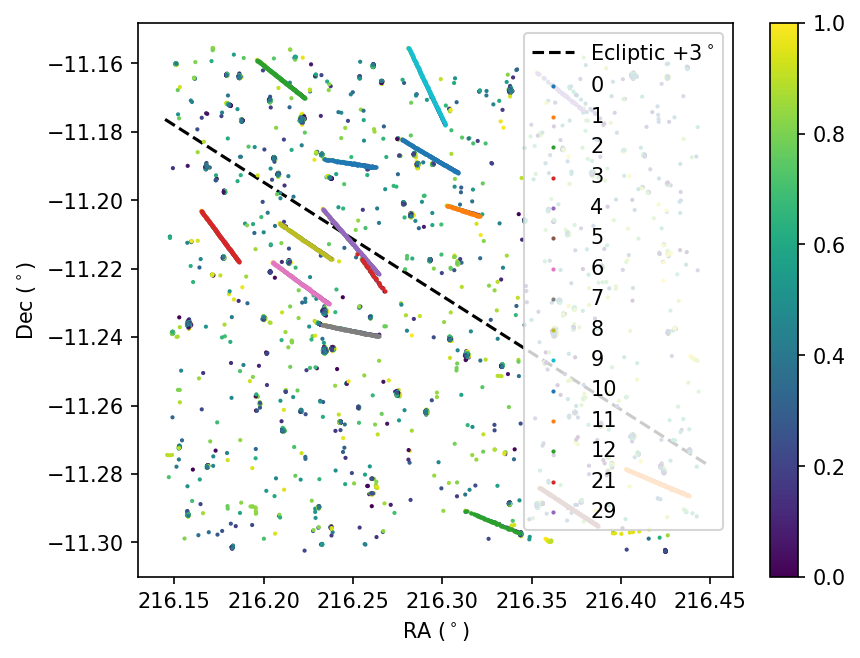

In [10]:
fig = plt.figure(dpi=150)
plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords.ra, coords.dec, c=time.to(u.hour).value, s=1)
for k in results:
    cluster = results[k]
    points_c = SkyCoord(cluster.points[:, 0]*u.deg, cluster.points[:, 1]*u.deg)
    plt.scatter(points_c.ra, points_c.dec, s=1, label=f"{k}")
#     break
plt.legend()
plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
plt.legend()
plt.show()

In [11]:
fig = plt.figure(dpi=150)
plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords.ra, coords.dec, c=time.to(u.hour).value, s=1)
for fake in fakes.group_by("ORBITID").groups:
    fake_c = SkyCoord(fake['RA']*u.deg, fake['DEC']*u.deg)
    plt.scatter(fake_c.ra, fake_c.dec, s=1)
plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
plt.legend()
plt.show()

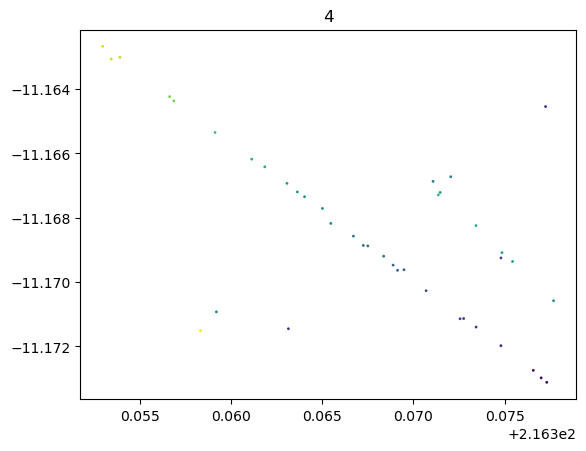

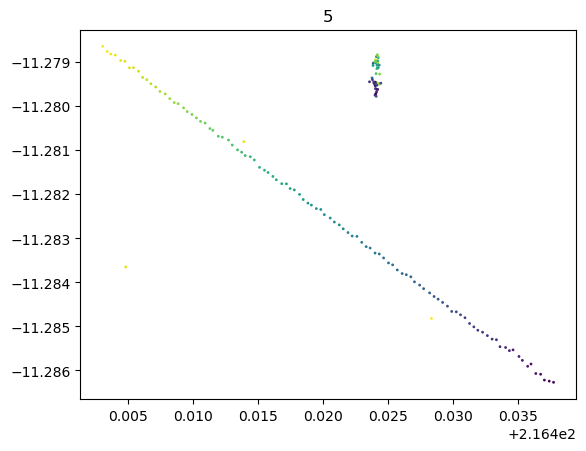

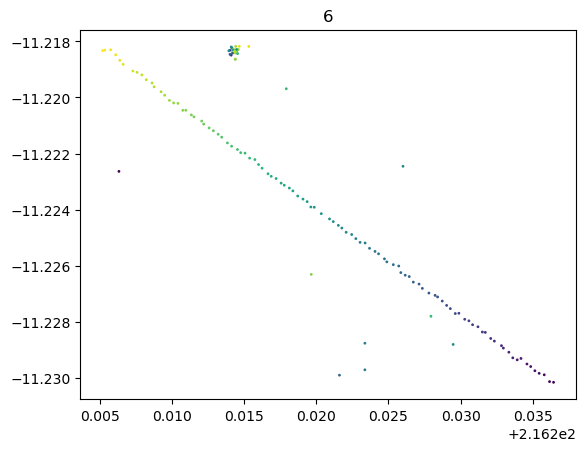

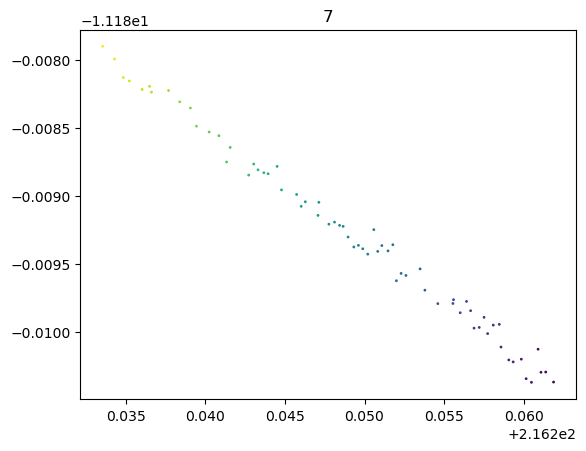

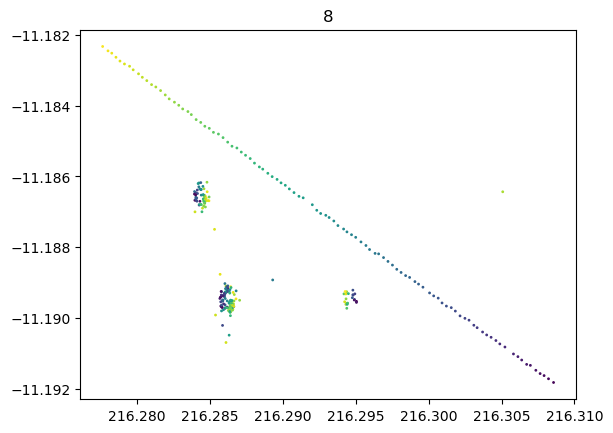

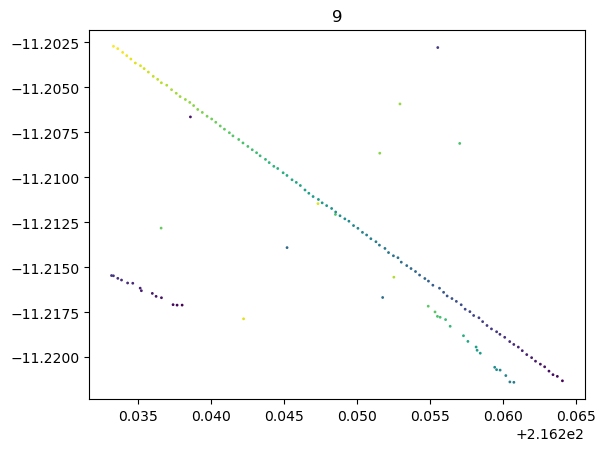

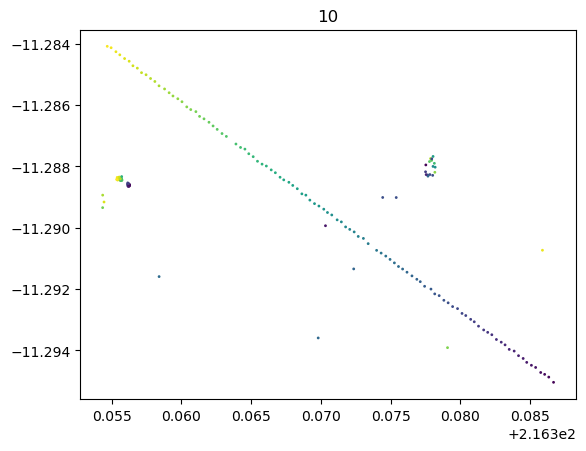

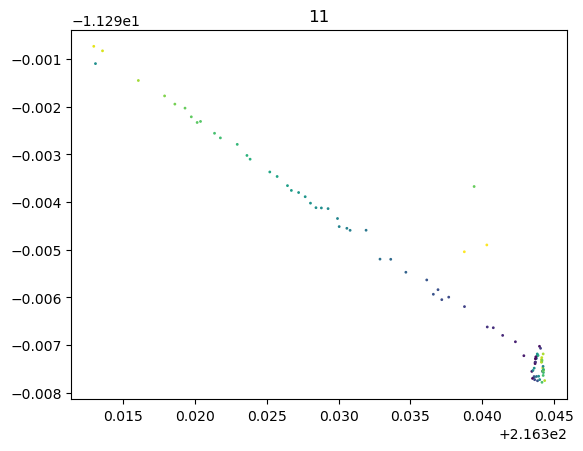

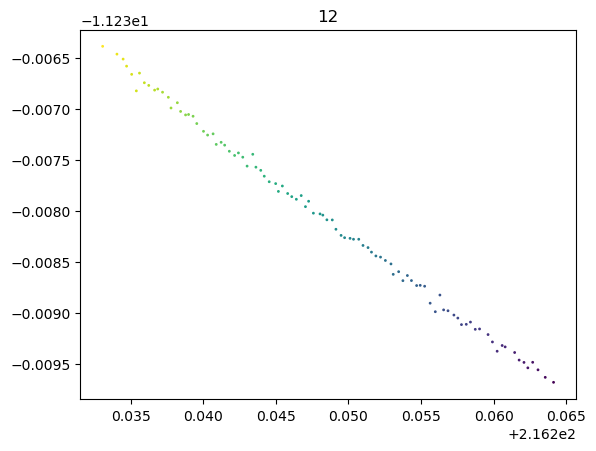

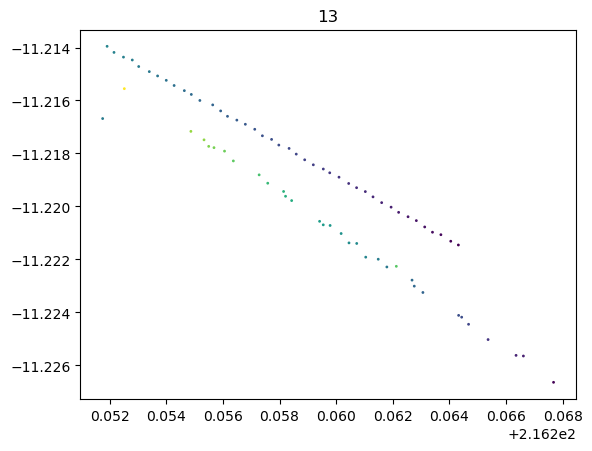

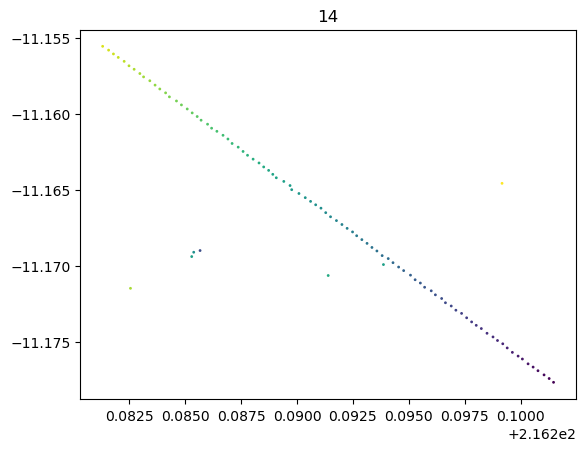

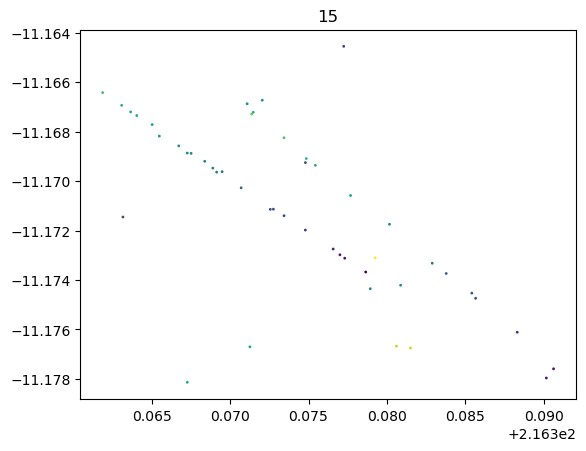

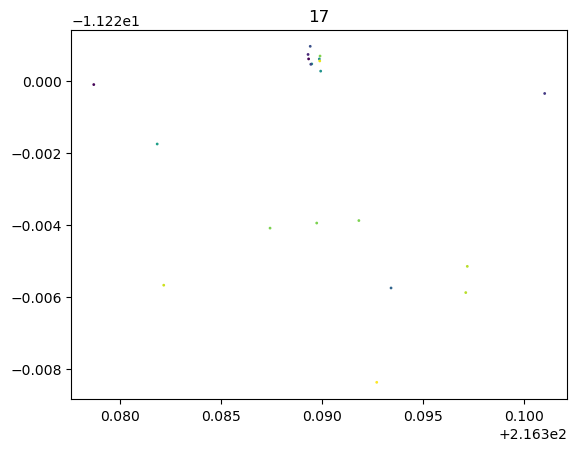

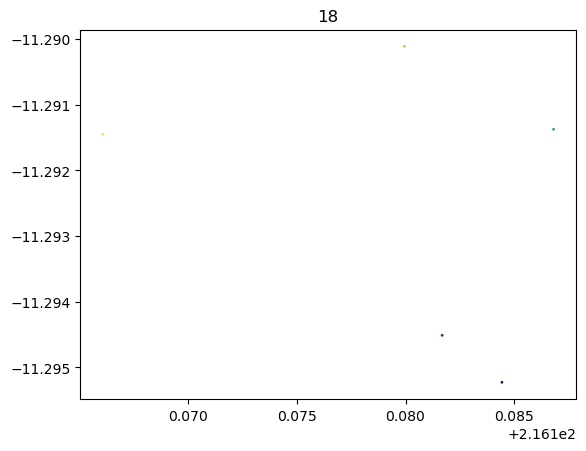

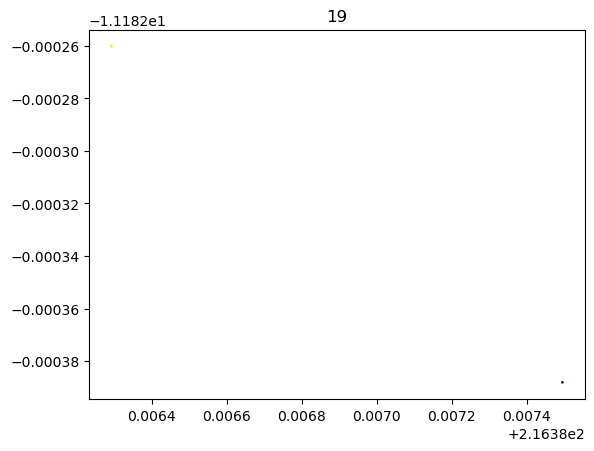

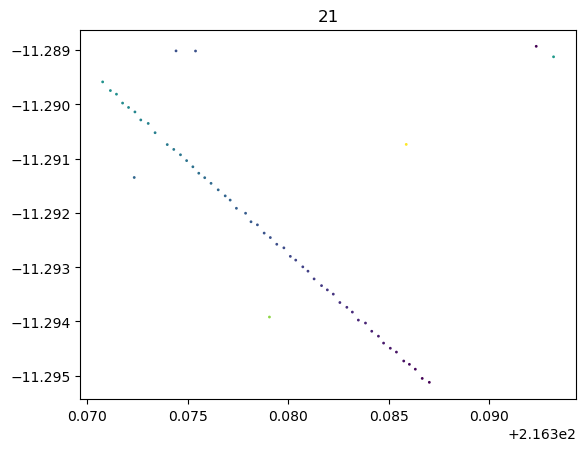

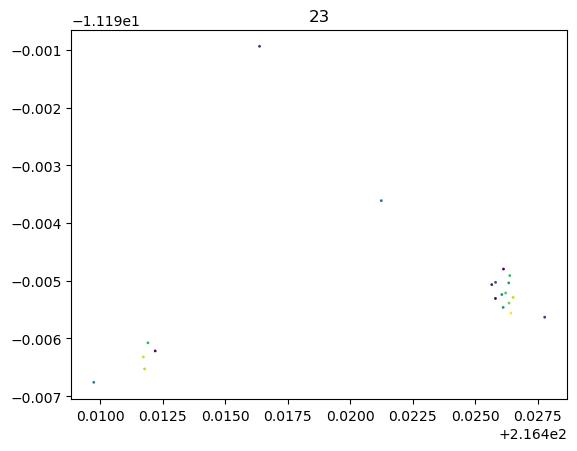

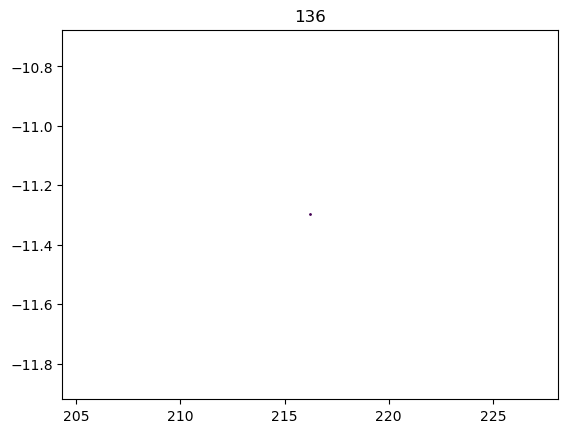

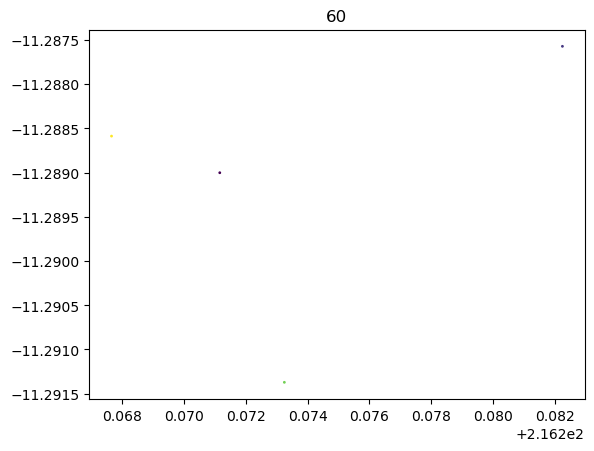

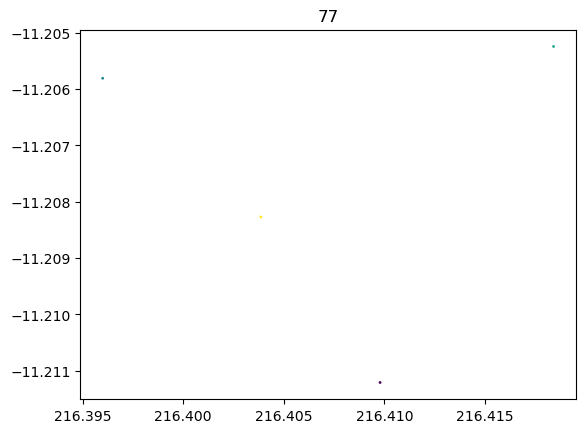

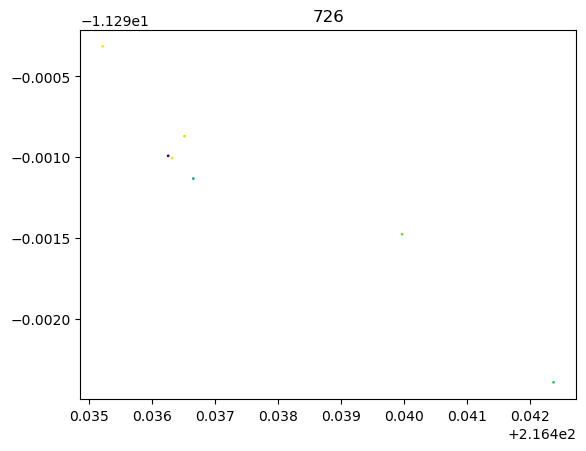

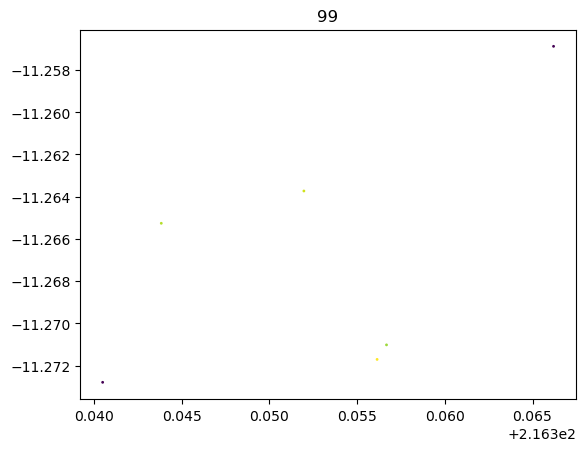

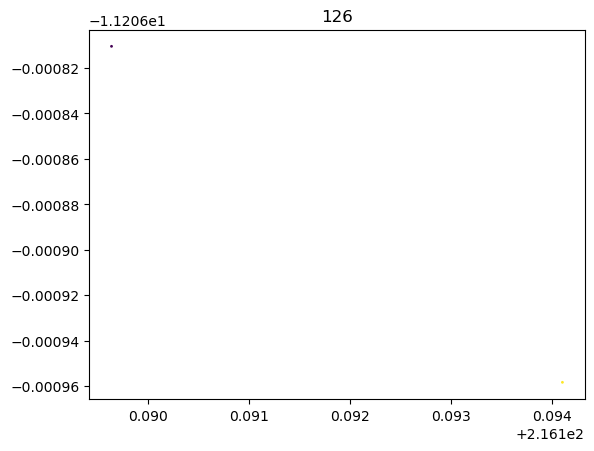

In [12]:
for k in results_3:
    cluster = results_3[k]
    points_c = SkyCoord(cluster.points[:, 0]*u.deg, cluster.points[:, 1]*u.deg)
    
    m = (
        (coords.ra < points_c.ra.max()) & 
        (coords.ra > points_c.ra.min()) &
        (coords.dec > points_c.dec.min()) &
        (coords.dec < points_c.dec.max())
    )
    plt.title(k)
    plt.scatter(coords[m].ra, coords[m].dec, c=time[m].to(u.hour).value, s=1)
    plt.show()

In [13]:
exposures = {
    image.expnum: image.exposure
    for image in images
}
exposures = {
    k: exposures[k]
    for k in sorted(exposures.keys())
}

exp_times = {
    image.expnum: image.mjd_mid
    for image in images
}
exp_times = {
    k: exp_times[k]
    for k in sorted(exp_times.keys())
}

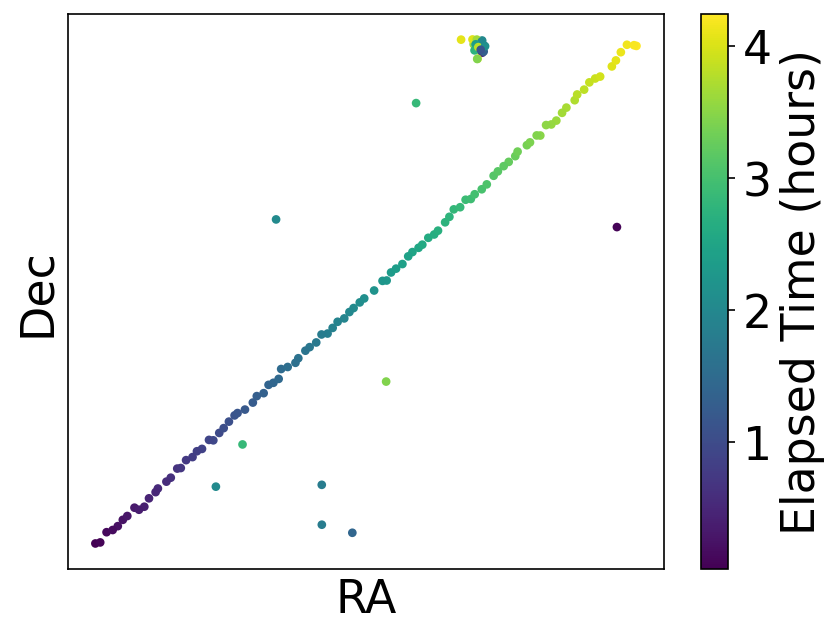

In [6]:
k = 6
cluster = results[k]
points_c = SkyCoord(cluster.points[:, 0]*u.deg, cluster.points[:, 1]*u.deg)

m = (
    (coords.ra < points_c.ra.max()) & 
    (coords.ra > points_c.ra.min()) &
    (coords.dec > points_c.dec.min()) &
    (coords.dec < points_c.dec.max())
)

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords[m].ra, coords[m].dec, c=time[m].to(u.hour).value, s=10)
cbar = plt.colorbar()

cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
center_ra = (points_c.ra.max() - points_c.ra.min()) / 2 + points_c.ra.min()
center_dec = (points_c.dec.max() - points_c.dec.min()) / 2 + points_c.dec.min()
center = lsst.geom.SpherePoint(center_ra.value, center_dec.value, lsst.geom.degrees)
w = 150
cutouts = {}
centered_cutouts = {}
locations = {}
for k in list(exposures.keys()):
    cutout = exposures[k].getCutout(
        center,
        lsst.geom.Extent2I(w)
    )
    l = cluster.line.predict(exp_times[k] * u.day)[0]
    s = lsst.geom.SpherePoint(l[0].value, l[1].value, lsst.geom.degrees)
    p = cutout.wcs.skyToPixel(s)
    
    if lsst.geom.Box2D(cutout.getBBox()).contains(p):
        cutouts[k] = cutout
        centered_cutouts[k] = exposures[k].getCutout(
            s,
            lsst.geom.Extent2I(w)
        )
#         locations[k] = (p.getX() - b.beginX, p.getY() - b.beginY)
        locations[k] = p


In [18]:
from astropy.visualization import (ZScaleInterval, SqrtStretch,
                                   ImageNormalize, MinMaxInterval)


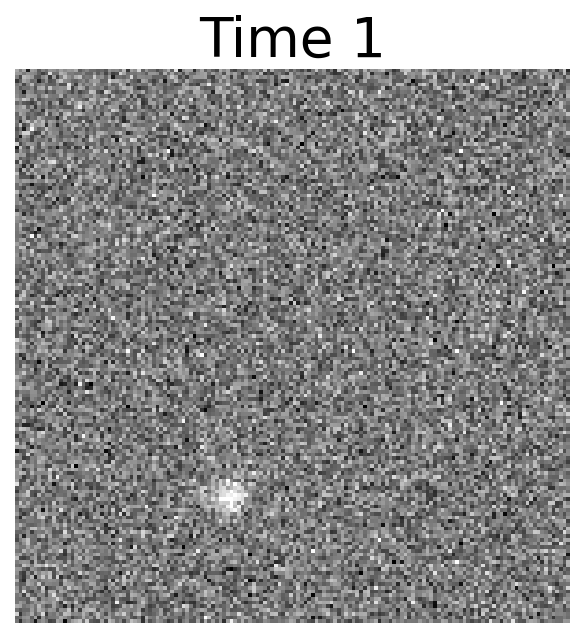

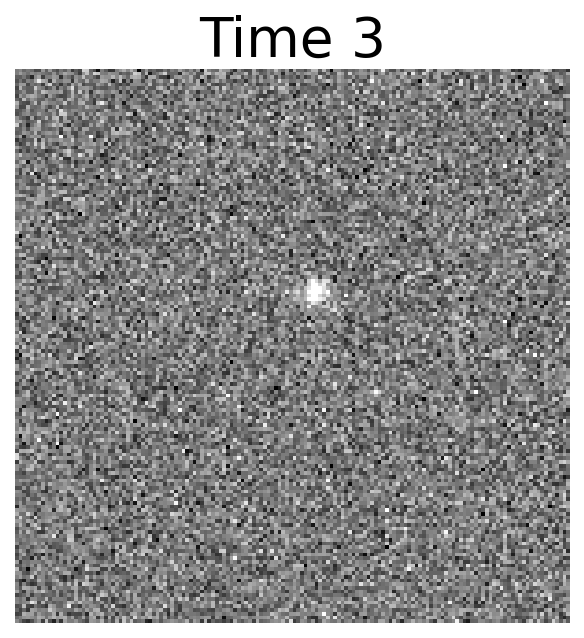

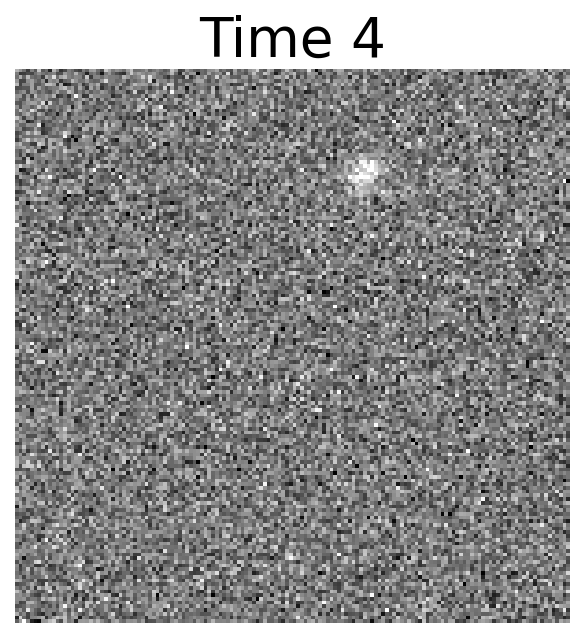

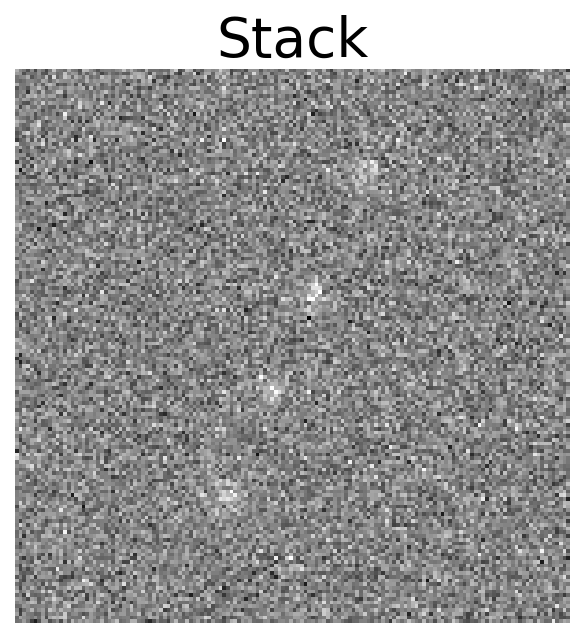

In [58]:
k1 = list(cutouts.keys())[0+int(1*(len(cutouts)-10)/4)+1]
k2 = list(cutouts.keys())[0+int(2*(len(cutouts)-10)/4) + 1]
k3 = list(cutouts.keys())[0+int(3*(len(cutouts)-10)/4)+1]
k4 = list(cutouts.keys())[0+int(4*(len(cutouts)-10)/4)+1]
v = [
        cutouts[k1].image.array, 
        cutouts[k2].image.array, 
        cutouts[k3].image.array, 
        cutouts[k4].image.array, 
    ]
norm = ImageNormalize(
    v,
    interval=ZScaleInterval()
)

for i, k in enumerate([k1, k2, k3, k4]):
    cutout = cutouts[k]
    fig = plt.figure(dpi=150)
    plt.imshow(cutout.image.array, cmap='gray', norm=norm)#vmin=-100, vmax=300)
    p = locations[k]
#     plt.scatter(p[0], p[1], facecolor='none', edgecolor='C0', s=200)
    plt.gca().invert_xaxis()
    plt.axis("off")
    plt.title(f"Time {i+1}")
    plt.show()
    
coadd = np.nanmean(v, axis=0)
norm = ImageNormalize(
    coadd,
    interval=ZScaleInterval()
)

fig = plt.figure(dpi=150)
plt.imshow(coadd, cmap='gray', norm=norm)
plt.title("Stack")
plt.gca().invert_xaxis()
plt.axis("off")
plt.show()

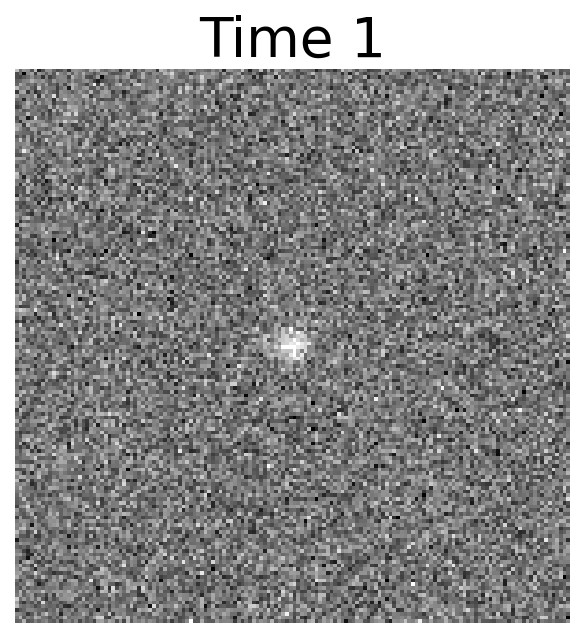

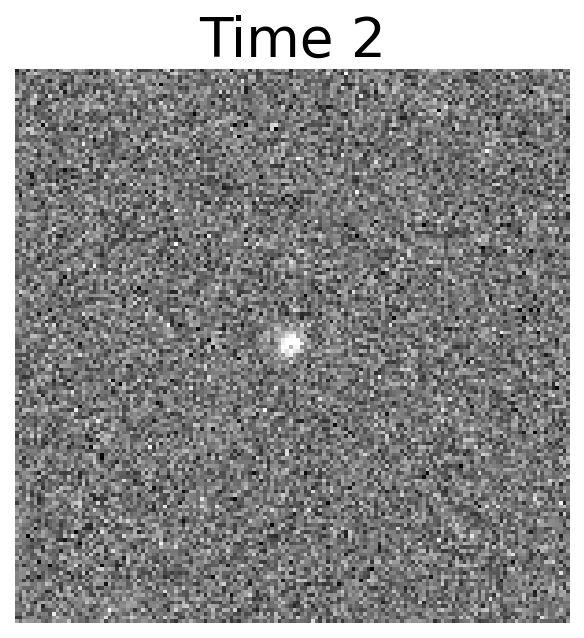

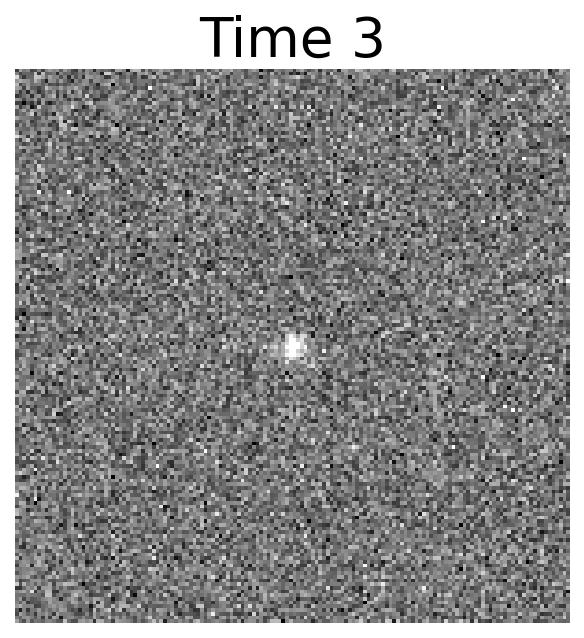

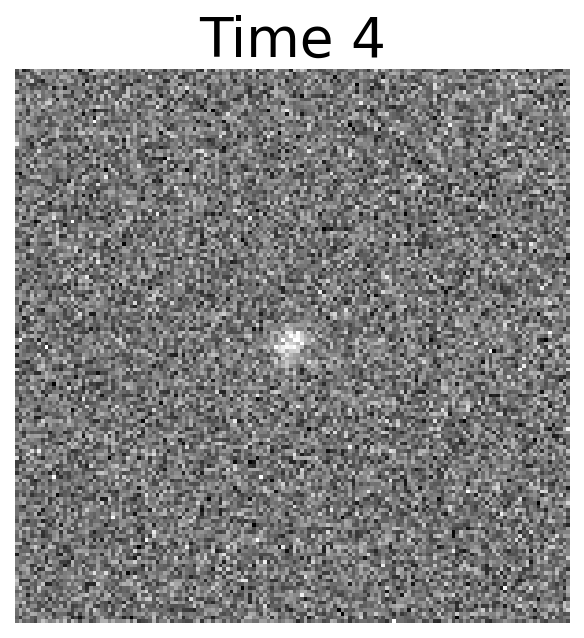

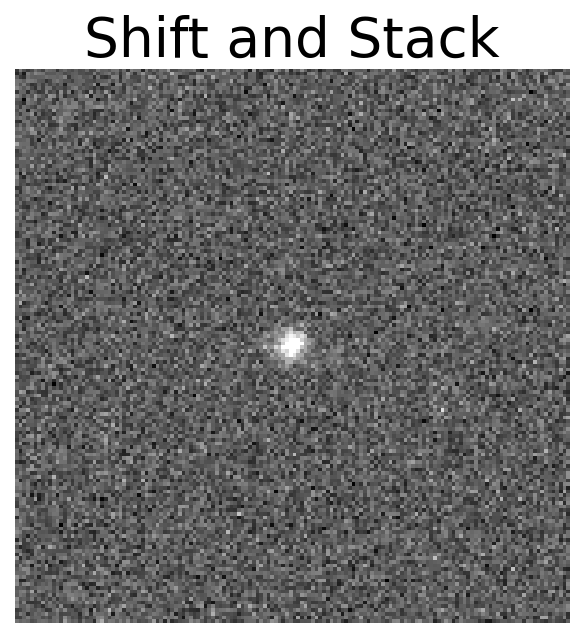

In [57]:

v = [
        centered_cutouts[k1].image.array, 
        centered_cutouts[k2].image.array, 
        centered_cutouts[k3].image.array, 
        centered_cutouts[k4].image.array, 
    ]
norm = ImageNormalize(
    v,
    interval=ZScaleInterval()
)

for i, k in enumerate([k1, k2, k3, k4]):
    cutout = centered_cutouts[k]
    fig = plt.figure(dpi=150)
    plt.imshow(cutout.image.array, cmap='gray', norm=norm)#vmin=-100, vmax=300)
    p = locations[k]
#     plt.scatter(p[0], p[1], facecolor='none', edgecolor='C0', s=200)
    plt.gca().invert_xaxis()
    plt.axis("off")
    plt.title(f"Time {i+1}")
    plt.show()
    
norm = ImageNormalize(
    np.nanmean(v, axis=0),
    interval=ZScaleInterval()
)

fig = plt.figure(dpi=150)
plt.imshow(np.nanmean(v, axis=0), cmap='gray', norm=norm)
plt.title("Shift and Stack")
plt.gca().invert_xaxis()
plt.axis("off")
plt.show()

In [33]:
from salad.detection import detect
from salad.catalog import MultiEpochDetectionCatalog

In [160]:
catalogs = []
for k in [k1, k2, k3, k4]:
    catalogs.append(detect(cutouts[k], threshold=5))

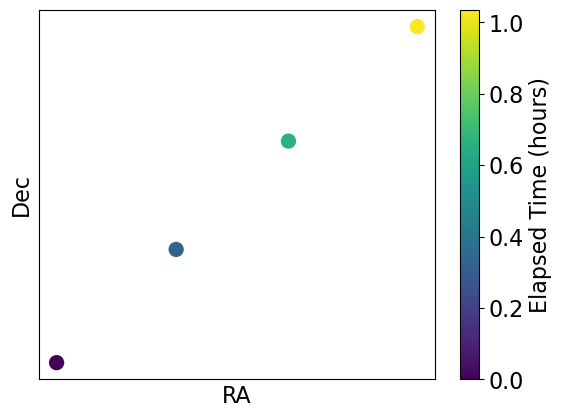

In [167]:
x = MultiEpochDetectionCatalog(catalogs).X()
plt.scatter(x[:, 0], x[:, 1], c=(x[:, 2] - x[:, 2].min())*24, s=100)

cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
plt.xticks([])
plt.yticks([])

plt.gca().invert_xaxis()
plt.show()

In [60]:
from salad.directions import SearchDirections

In [81]:
(2048*4096)*((0.2637 * u.arcsec)**2) / (1 * u.arcsec)**2

<Quantity 583324.42263552>

In [87]:
len(
    SearchDirections(
        [0.1, 0.5]*u.deg/u.day, [0, 180] * u.deg, 
        1 * u.arcsec, 
        4 * u.hour
    ).b
) * 2 * (2048*4096)*(1 * u.arcsec)/(1*u.arcsec)#*((0.2637 * u.arcsec)**2) / (1 * u.arcsec)**2

<Quantity 2.28087929e+12>

In [156]:
len(
    SearchDirections(
        [0.1, 0.5]*u.deg/u.day, [0, 180] * u.deg, 
        10 * u.arcsec, 
        4 * u.hour
    ).b
) * 2 * (2048*4096)*(1 * u.arcsec)/(10*u.arcsec)#*((0.2637 * u.arcsec)**2) / (1 * u.arcsec)**2

<Quantity 2.31693353e+09>

In [152]:
len(
    SearchDirections(
        [1.4, 4.5] * u.arcsec/u.hour, 
        [0, 180] * u.deg, 
        1 * u.arcsec, 
        4 * u.hour
    ).b
)* 2 * (2048*4096)*(1 * u.arcsec)/(1*u.arcsec)#*((0.2637 * u.arcsec)**2) / (1 * u.arcsec)**2

<Quantity 7.8685143e+09>

In [158]:
len(
    SearchDirections(
        [1.4, 4.5] * u.arcsec/u.hour, 
        [0, 180] * u.deg, 
        10 * u.arcsec, 
        4 * u.hour
    ).b
)* 2 * (2048*4096)*(1 * u.arcsec)/(10*u.arcsec)/1e6#*((0.2637 * u.arcsec)**2) / (1 * u.arcsec)**2

<Quantity 8.388608>

In [ ]:
norm = ImageNormalize(
    np.nanmean(v, axis=0),
    interval=ZScaleInterval()
)

fig = plt.figure(dpi=150)
plt.imshow(np.nanmean(v, axis=0), cmap='gray', norm=norm)
plt.title("Shift and Stack")
plt.gca().invert_xaxis()
plt.show()

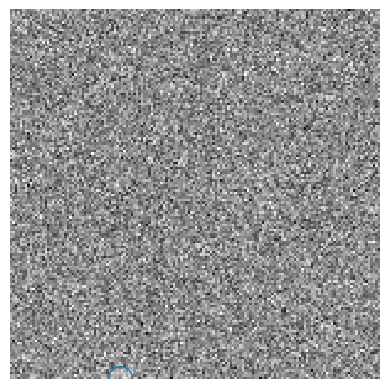

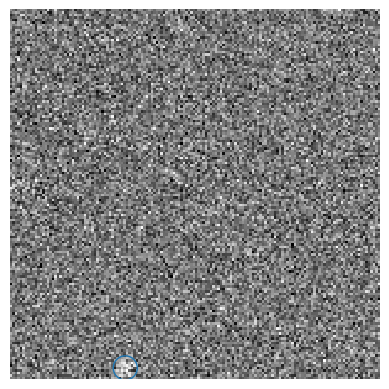

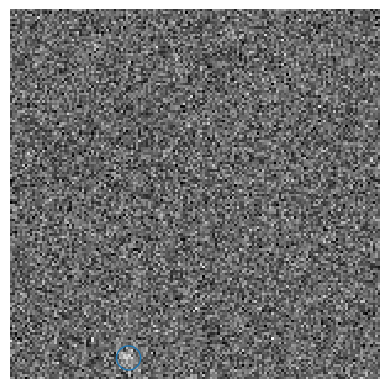

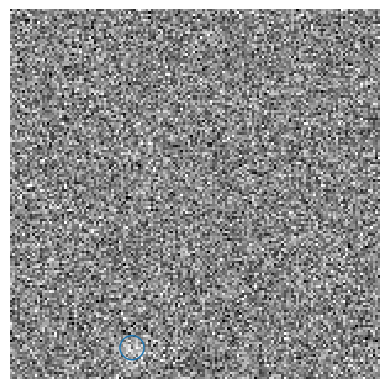

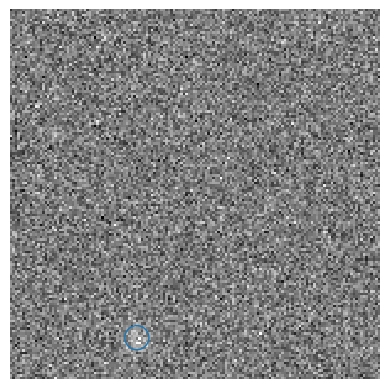

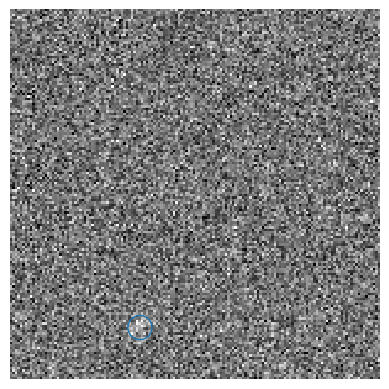

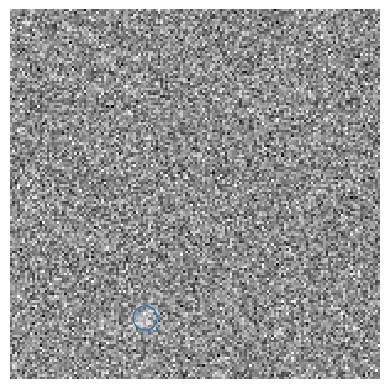

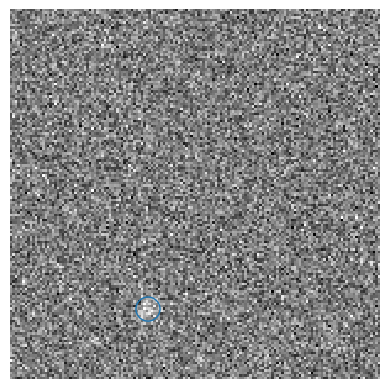

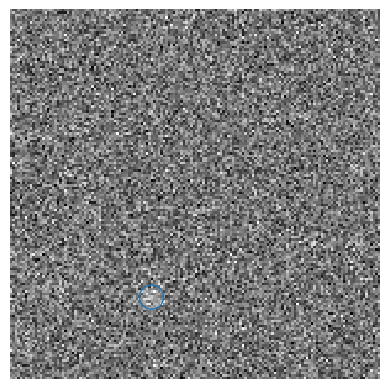

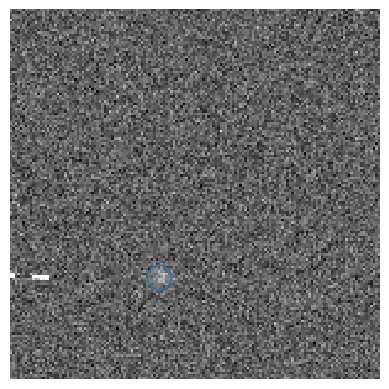

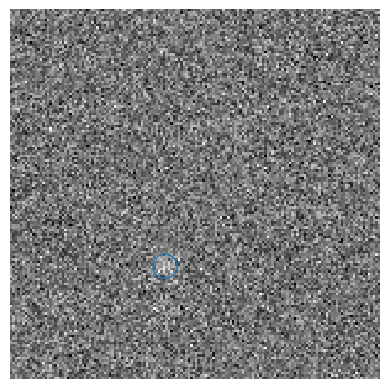

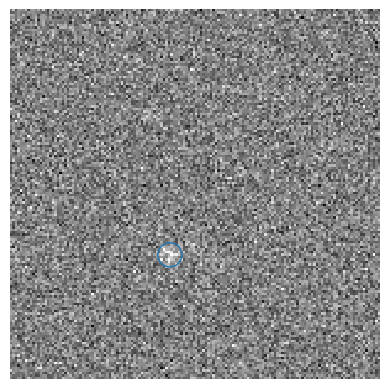

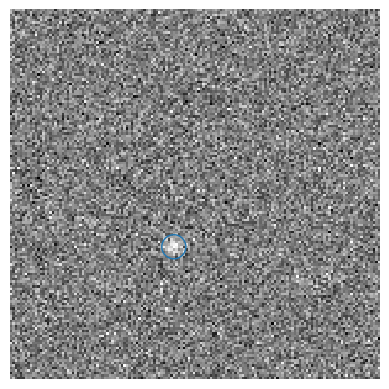

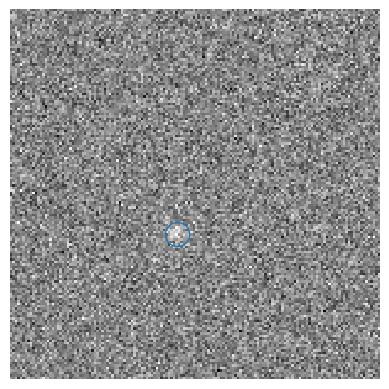

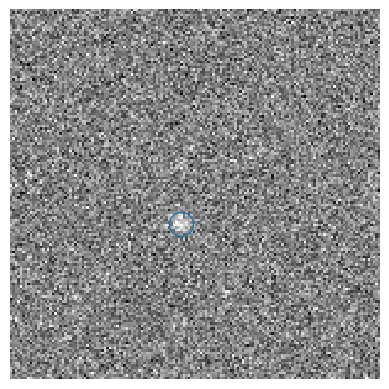

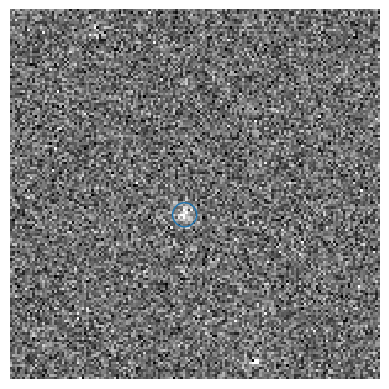

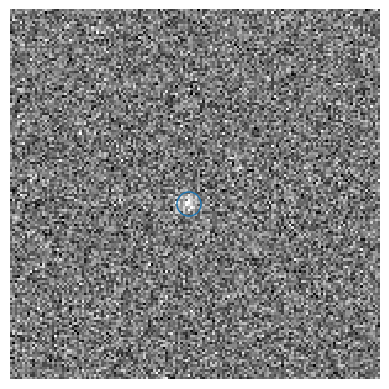

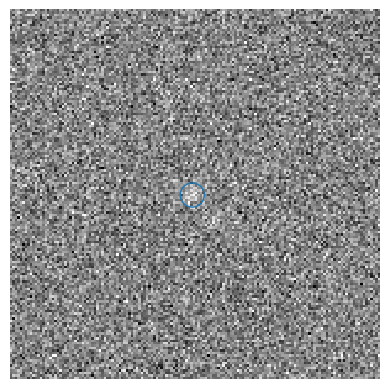

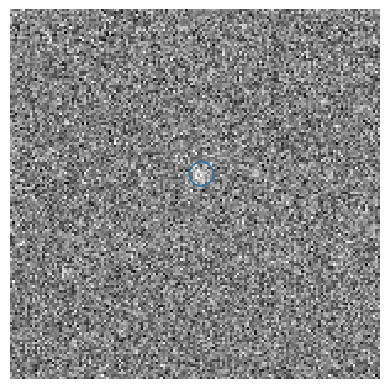

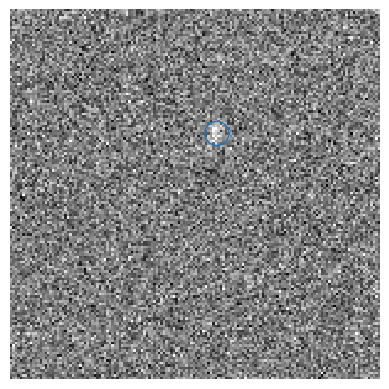

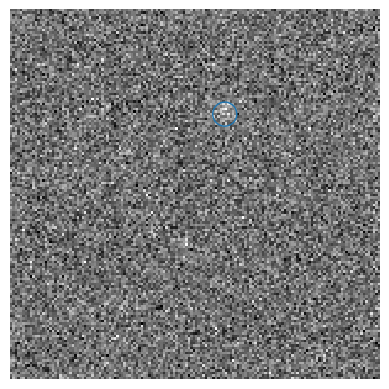

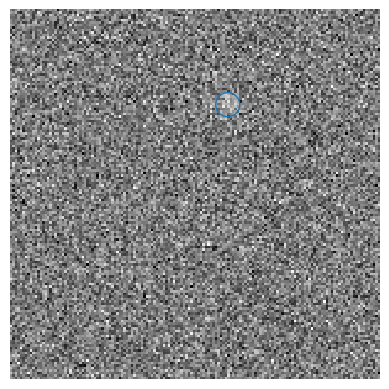

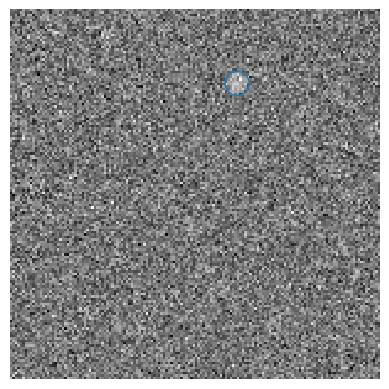

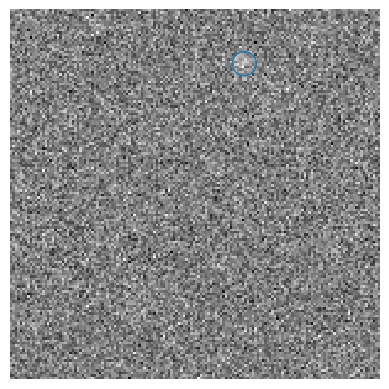

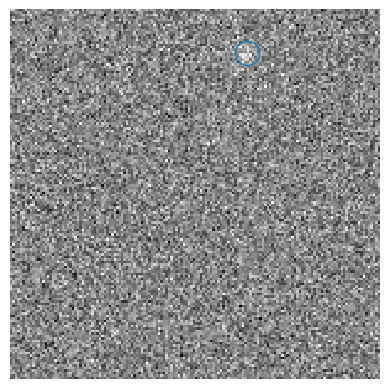

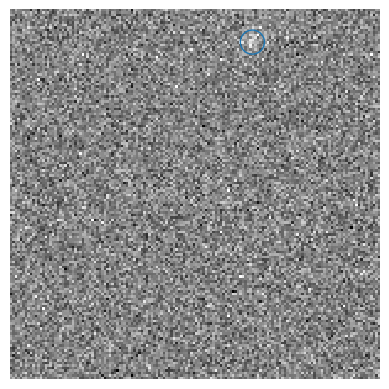

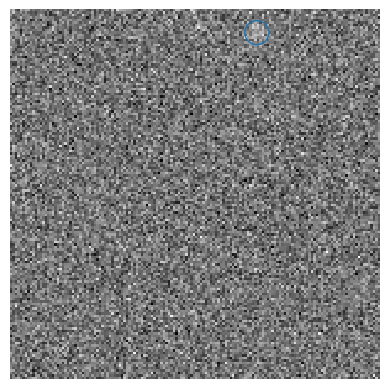

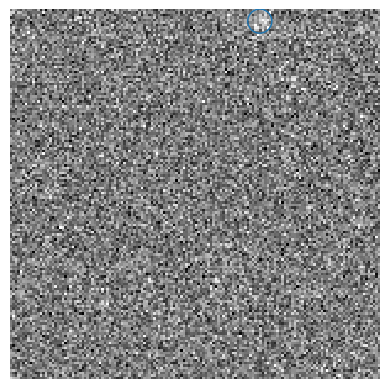

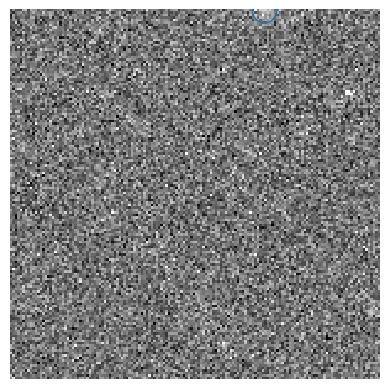

In [376]:
# k = list(cutouts.keys())[0]
k = list(cutouts.keys())[int(len(cutouts)/2)]
# k = list(cutouts.keys())[-1]
for k in cutouts:
    cutout = cutouts[k]
    p = locations[k]
    fig = plt.figure()
    display = afwDisplay.Display(frame=fig)
    display.scale("linear", "zscale")
    display.mtv(cutout.image)
    plt.scatter(p.getX(), p.getY(), facecolor='none', edgecolor='C0', s=300)
    display.show_colorbar(show=False)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.axis("off")
    plt.show()

In [353]:
from salad.detection import detect

In [ ]:
detect()

In [333]:

# print((points_c.ra.max() - points_c.ra.min()).to(u.arcsec).value / 0.263)

# for k in list(exposures.keys()):
#     cutout = exposures[k].getCutout(
#         lsst.geom.SpherePoint(center_ra.value, center_dec.value, lsst.geom.degrees),
#         lsst.geom.Extent2I(350)
#     )
#     plt.imshow(cutout.image.array, cmap='gray_r', vmin=vmin, vmax=300)
#     plt.show()
# #     break
    

# #     fig = plt.figure()
# #     display = afwDisplay.Display(frame=fig)
# #     display.scale("linear", "zscale")
# #     display.mtv(cutout.image)
# #     display.show_colorbar(show=False)
# #     plt.show()

In [111]:
clusters[k].line

In [122]:
cluster.line.predict(X[:, 2].min()*u.day)

<Quantity [[216.22306919, -11.17012217]] deg>

In [131]:
cluster.line.beta[0][0] * time.max()

<Quantity -0.02684815 deg>

In [144]:
clusters[k].line.beta

<Quantity [-0.15740941,  0.06060279] deg / d>

In [135]:
dx

<Quantity -0.02684815 deg>

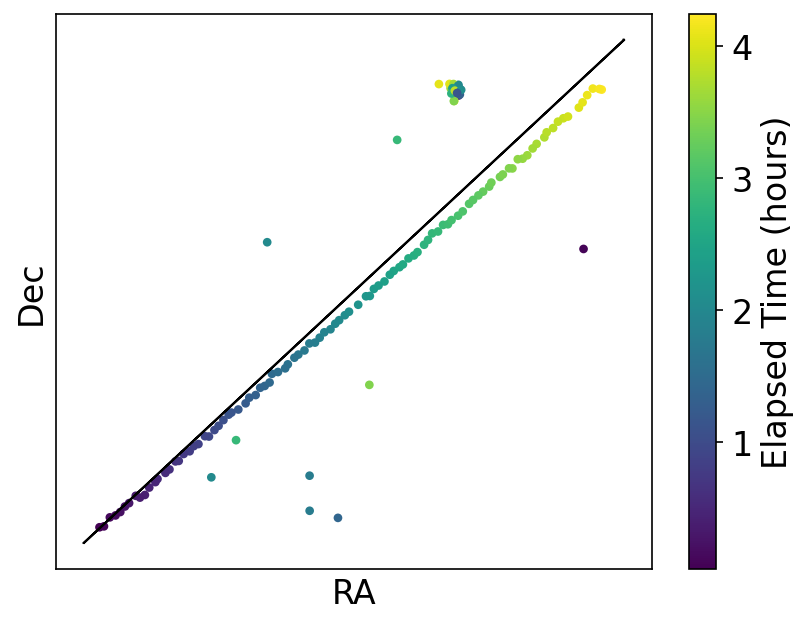

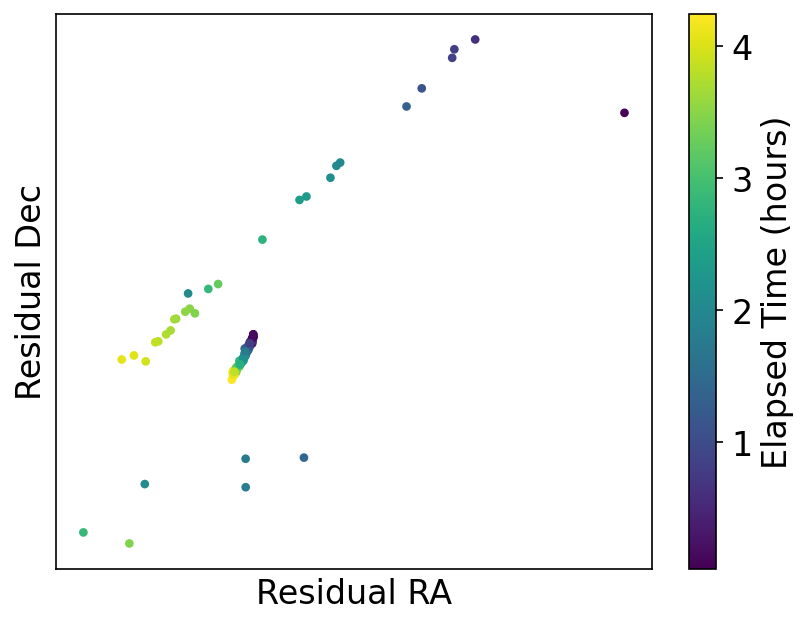

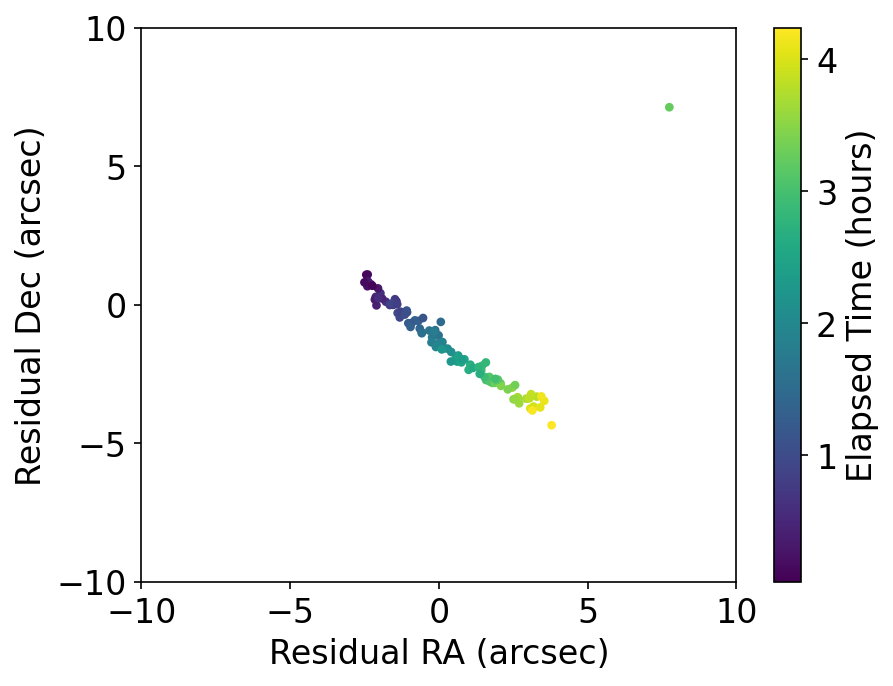

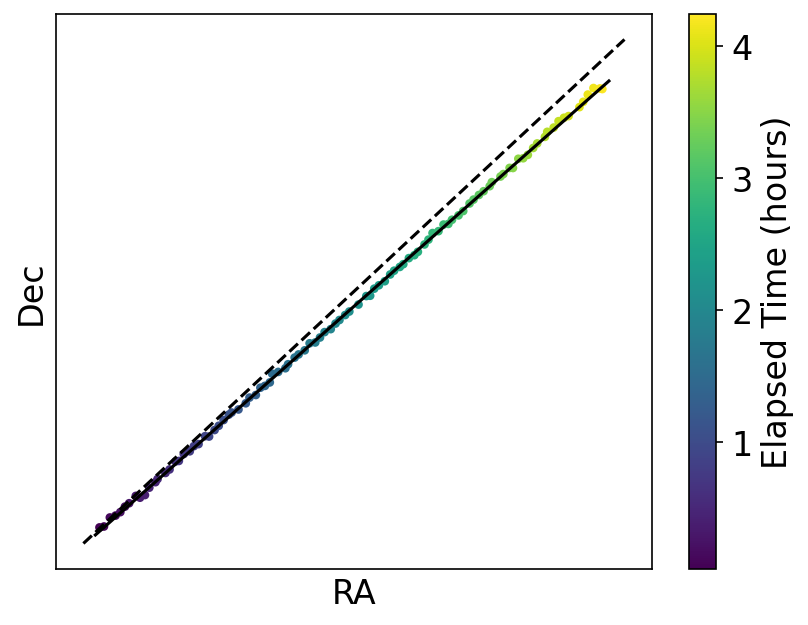

In [11]:
k = 6
# k = 3
cluster = results[k]
cluster_c = clusters[k]
points_c = SkyCoord(cluster.points[:, 0]*u.deg, cluster.points[:, 1]*u.deg)

m = (
    (coords.ra < points_c.ra.max()) & 
    (coords.ra > points_c.ra.min()) &
    (coords.dec > points_c.dec.min()) &
    (coords.dec < points_c.dec.max())
)

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords[m].ra, coords[m].dec, c=time[m].to(u.hour).value, s=10)
anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = cluster_c.line.beta[0] * time.max()
dy = cluster_c.line.beta[1] * time.max()
plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.show()

y_hat = cluster_c.line.predict(X[m, 2] * u.day)
dra = coords[m].ra - y_hat[:, 0]
ddec = coords[m].dec - y_hat[:, 1]

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(dra.to(u.arcsec), ddec.to(u.arcsec), c=time[m].to(u.hour).value, s=10)
# anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
# anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

# dx = cluster_c.line.beta[0] * time.max()
# dy = cluster_c.line.beta[1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"Residual RA")
plt.ylabel(r"Residual Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.show()

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(dra.to(u.arcsec), ddec.to(u.arcsec), c=time[m].to(u.hour).value, s=10)
# anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
# anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

# dx = cluster_c.line.beta[0] * time.max()
# dy = cluster_c.line.beta[1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"Residual RA (arcsec)")
plt.ylabel(r"Residual Dec (arcsec)")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([-10 + i*5 for i in range(5)])
plt.yticks([-10 + i*5 for i in range(5)])
# plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

m2 = (
    (dra < 5 * u.arcsec) &
    (dra > -5 * u.arcsec) &
    (ddec < 5 * u.arcsec) &
    (ddec > -5 * u.arcsec)
)

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords[m][m2].ra, coords[m][m2].dec, c=time[m][m2].to(u.hour).value, s=10)
anchor = results[k].line.predict(X[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = results[k].line.beta[0][0] * time.max()
dy = results[k].line.beta[0][1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)

plt.plot(
    [anchor.ra.value, anchor.ra.value + dx.value], 
    [anchor.dec.value, anchor.dec.value + dy.value], 
    ls="-", color='k'
)

anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = cluster_c.line.beta[0] * time.max()
dy = cluster_c.line.beta[1] * time.max()

plt.plot(
    [anchor.ra.value, anchor.ra.value + dx.value], 
    [anchor.dec.value, anchor.dec.value + dy.value], 
    ls="--", color='k'
)

# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.show()


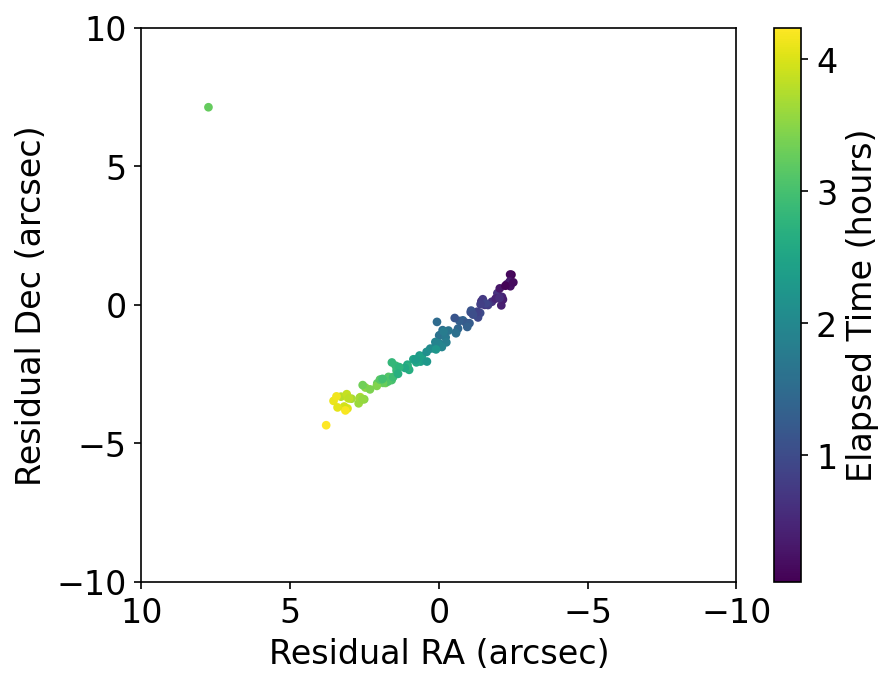

In [15]:
fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(dra.to(u.arcsec), ddec.to(u.arcsec), c=time[m].to(u.hour).value, s=10)
# anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
# anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

# dx = cluster_c.line.beta[0] * time.max()
# dy = cluster_c.line.beta[1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"Residual RA (arcsec)")
plt.ylabel(r"Residual Dec (arcsec)")
# plt.legend()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([-10 + i*5 for i in range(5)])
plt.yticks([-10 + i*5 for i in range(5)])
# plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.gca().invert_xaxis()
plt.show()


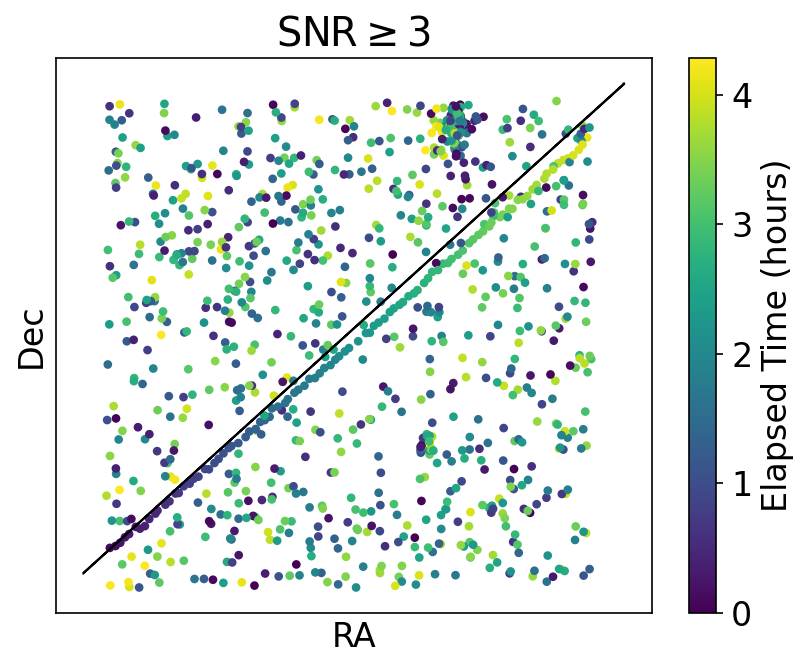

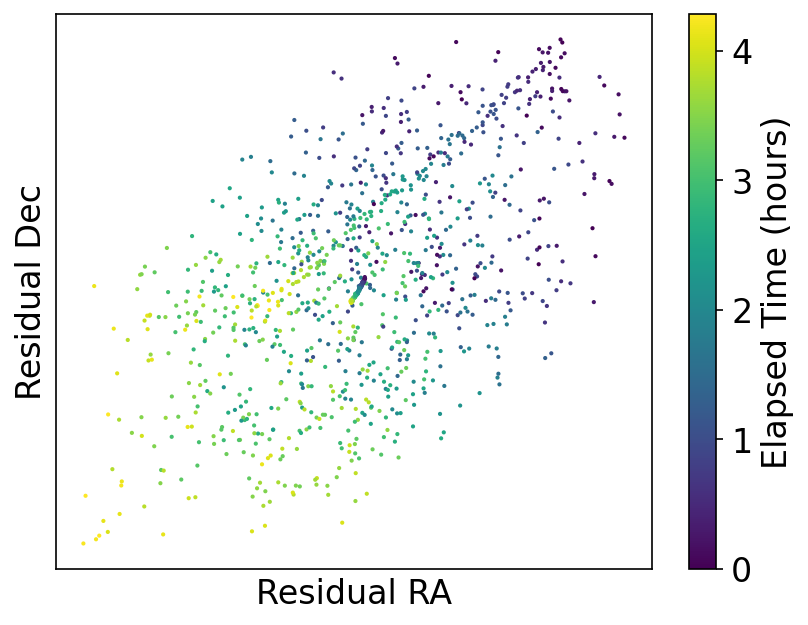

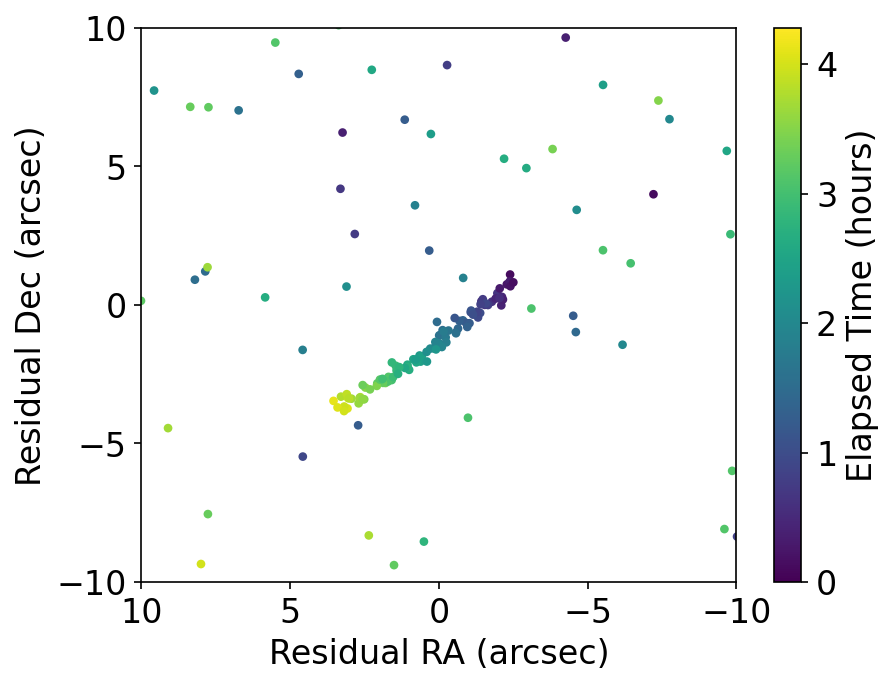

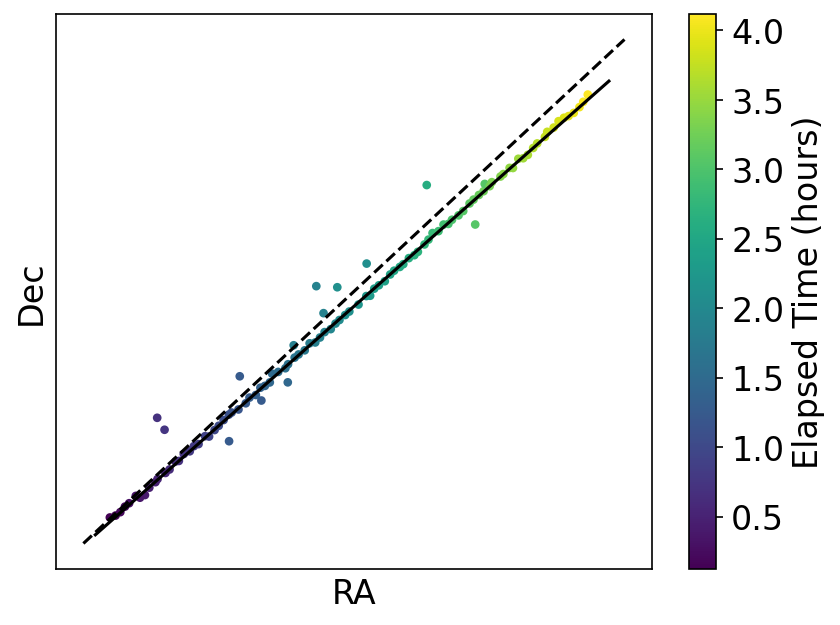

In [17]:
k = 6
cluster = results[k]
cluster_c = clusters[k]
points_c = SkyCoord(cluster.points[:, 0]*u.deg, cluster.points[:, 1]*u.deg)

m = (
    (coords_3.ra < points_c.ra.max() - 2.5 * u.arcsec) & 
    (coords_3.ra > points_c.ra.min() + 2.5 * u.arcsec) &
    (coords_3.dec > points_c.dec.min() - 2.5 * u.arcsec) &
    (coords_3.dec < points_c.dec.max() + 2.5 * u.arcsec)
)

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords_3[m].ra, coords_3[m].dec, c=time_3[m].to(u.hour).value, s=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
# plt.legend()
plt.gca().invert_xaxis()
anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = cluster_c.line.beta[0] * time.max()
dy = cluster_c.line.beta[1] * time.max()
plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)


matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
plt.title(r"SNR$\geq$3")
# plt.legend()
plt.show()

y_hat = cluster_c.line.predict(X_3[m, 2] * u.day)
dra = coords_3[m].ra - y_hat[:, 0]
ddec = coords_3[m].dec - y_hat[:, 1]

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(dra.to(u.arcsec), ddec.to(u.arcsec), c=time_3[m].to(u.hour).value, s=1)
# anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
# anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

# dx = cluster_c.line.beta[0] * time.max()
# dy = cluster_c.line.beta[1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"Residual RA")
plt.ylabel(r"Residual Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
# plt.legend()
plt.show()

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(dra.to(u.arcsec), ddec.to(u.arcsec), c=time_3[m].to(u.hour).value, s=10)
# anchor = cluster_c.line.predict(X[:, 2].min()*u.day)[0]
# anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

# dx = cluster_c.line.beta[0] * time.max()
# dy = cluster_c.line.beta[1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)
# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"Residual RA (arcsec)")
plt.ylabel(r"Residual Dec (arcsec)")
# plt.legend()

matplotlib.rcParams.update({'font.size': 16})
# plt.xticks([])
# plt.yticks([])
# plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xticks([-10 + i*5 for i in range(5)])
plt.yticks([-10 + i*5 for i in range(5)])
plt.gca().invert_xaxis()

plt.show()

m2 = (
    (dra < 5 * u.arcsec) &
    (dra > -5 * u.arcsec) &
    (ddec < 5 * u.arcsec) &
    (ddec > -5 * u.arcsec)
)

fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords_3[m][m2].ra, coords_3[m][m2].dec, c=time_3[m][m2].to(u.hour).value, s=10)
anchor = results_3[k].line.predict(X_3[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = results_3[k].line.beta[0][0] * time.max()
dy = results_3[k].line.beta[0][1] * time.max()
# plt.arrow(anchor.ra.value, anchor.dec.value, dx=dx.value, dy=dy.value, width=1e-5)

plt.plot(
    [anchor.ra.value, anchor.ra.value + dx.value], 
    [anchor.dec.value, anchor.dec.value + dy.value], 
    ls="-", color='k'
)

anchor = cluster_c.line.predict(X_3[:, 2].min()*u.day)[0]
anchor = SkyCoord(anchor[0], anchor[1])
# plt.scatter(anchor.ra, anchor.dec)

dx = cluster_c.line.beta[0] * time.max()
dy = cluster_c.line.beta[1] * time.max()

plt.plot(
    [anchor.ra.value, anchor.ra.value + dx.value], 
    [anchor.dec.value, anchor.dec.value + dy.value], 
    ls="--", color='k'
)

# plt.title("$v_{ra}$" + f" = {cluster_c.line.beta[0]:.2f}" + "\n$v_{dec}$ " + f"= {cluster_c.line.beta[1]:.2f}")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Elapsed Time (hours)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
# plt.legend()
plt.gca().invert_xaxis()

matplotlib.rcParams.update({'font.size': 16})
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 101633 but corresponding boolean dimension is 7151

<Figure size 960x720 with 0 Axes>

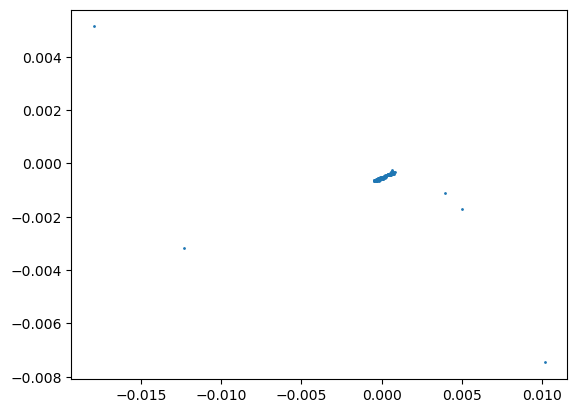

In [178]:
plt.scatter(dra, ddec, s=1, c=)
plt.show()

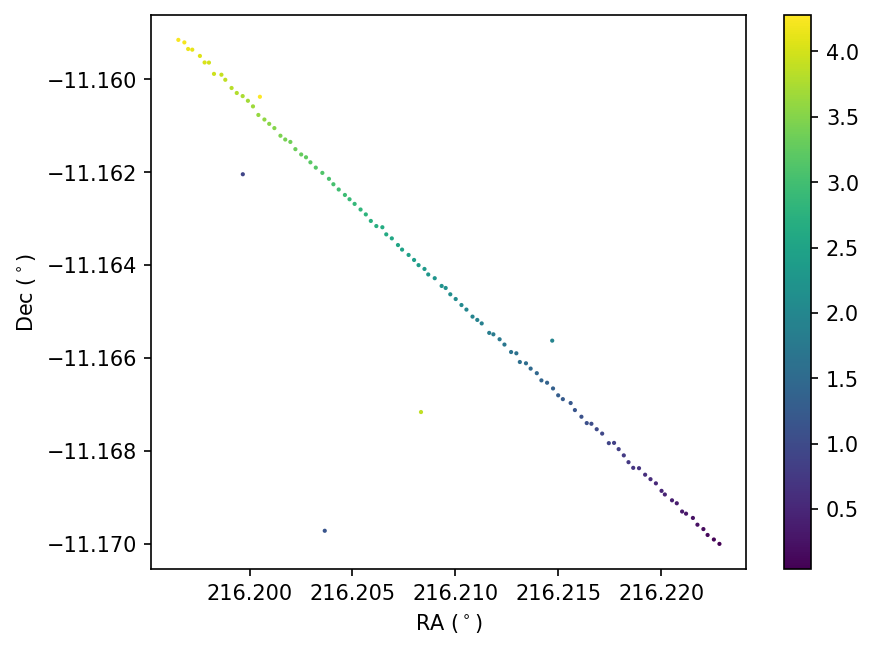

In [104]:
# cluster.line.predict(
#     (time[m] + X[m, 2].min() * u.day)
# )
fig = plt.figure(dpi=150)
# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords[m].ra, coords[m].dec, c=time[m].to(u.hour).value, s=1)
plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
# plt.legend()
plt.show()

In [111]:
len(catalog.X())/104

68.75961538461539

array([ True,  True,  True, ..., False, False, False])

In [60]:
m.sum()

272

In [263]:
s = SearchDirections([0, 0.1]*u.deg/u.day, [120, 140]*u.deg, 10*u.arcsec, 1*u.hour)
s._b = np.array([[]])

<Quantity [[-0.03333333,  0.03333333]] deg / d>

In [81]:
time.max().to(u.hour)

<Quantity 4.28110605 h>

In [82]:
np.cos(120*u.deg)

<Quantity -0.5>

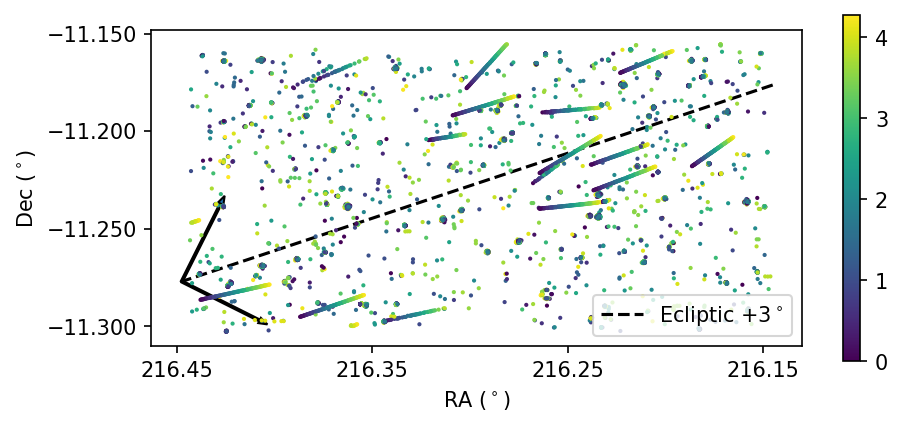

In [168]:
x, y = ecliptic.ra.max(), ecliptic.dec.min()
phi = 120 * u.deg
v = 0.25 * u.deg/u.day
dx = np.cos(phi) * v * time.max()
dy = np.sin(phi) * v * time.max()

fig = plt.figure(dpi=150, figsize=[7, 3])

v = 0.25 * u.deg/u.day

phi = 116.60849565668008 * u.deg
dx = np.cos(phi) * v * time.max()
dy = np.sin(phi) * v * time.max()
plt.arrow(x.value, y.value, dx.value, dy.value)

phi = 206.60849565668008 * u.deg
dx = np.cos(phi) * v * time.max()
dy = np.sin(phi) * v * time.max()
plt.arrow(x.value, y.value, dx.value, dy.value)


plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords.ra, coords.dec, c=time.to(u.hour).value, s=1)
plt.gca().set_aspect("equal")
plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
_x, _x_l = plt.xticks()
plt.xticks(_x[1::2], _x_l[1::2])
_y, _y_l = plt.yticks()
plt.yticks(_y[1::2], _y_l[1::2])
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [144]:
ecliptic.ra.max(), ecliptic.ra.min()

(<Angle 216.44767114 deg>, <Angle 216.1448921 deg>)

In [145]:
ecliptic.dec.max(), ecliptic.dec.min()

(<Angle -11.17635478 deg>, <Angle -11.2770261 deg>)

In [15]:
216.44767114 - 216.1448921

0.30277904000001854

In [16]:
11.17635478 - 11.2770261

-0.10067132000000001

In [29]:
np.arctan2(0.10067132000000001, -0.30277904000001854) * 180/np.pi

161.60849565668008

In [30]:
161.60849565668008 + 45

206.60849565668008

In [31]:
161.60849565668008 - 45

116.60849565668008

In [73]:
from salad.project import project, transform_to_xy_prime
from salad.directions import SearchDirections

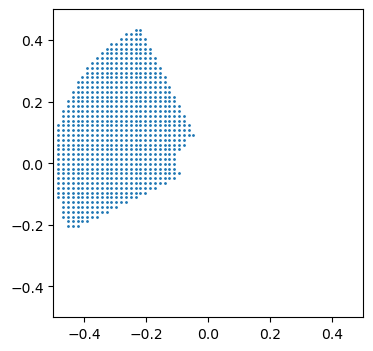

In [163]:
d = SearchDirections(
    [0.1, 0.5]*u.deg/u.day, 
    [116.60849565668008, 206.60849565668008]*u.deg, 
    10*u.arcsec, 
    time.max()
)
b = d.b

fig = plt.figure(figsize=[4, 4])
plt.scatter(b[:, 0], b[:, 1], s=1)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()

In [39]:
projection = project(X, d, X[:, 2].min())

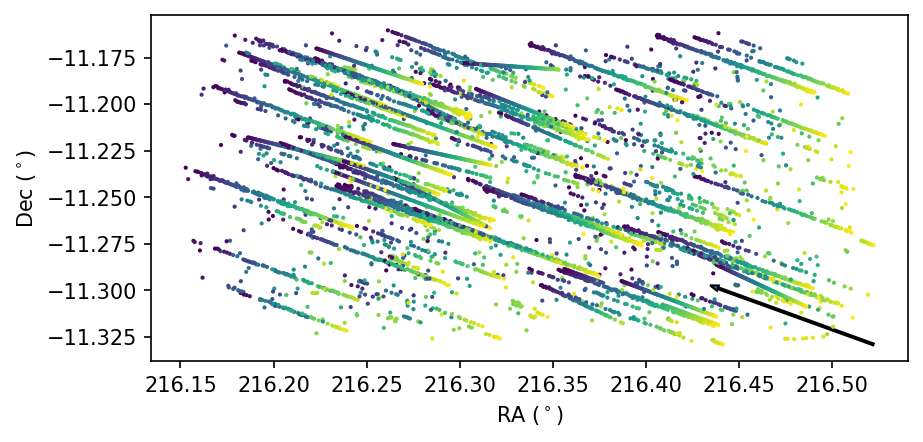

In [53]:
i = 500
coords_p = SkyCoord(projection.projected[i, :, 0]*u.deg, projection.projected[i, :, 1]*u.deg)

fig = plt.figure(dpi=150, figsize=[7, 3])

x, y = coords_p.ra.max(), coords_p.dec.min()
dx = d.b[i, 0] * time.max()
dy = d.b[i, 1] * time.max()
plt.arrow(x.value, y.value, dx.value, dy.value)

# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords_p.ra, coords_p.dec, c=time.to(u.hour).value, s=1)
plt.gca().set_aspect("equal")
# plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
# plt.legend()
plt.show()

In [54]:
from salad.hough import Hough

In [105]:
hough = Hough(projection, 10*u.arcsec, 10*u.arcsec)

In [106]:
hough.argmax()

(302, 103, 32)

In [146]:
d.b[:, 0].argmax()

391

In [133]:
"{:.1f}".format(1.23)

'1.2'

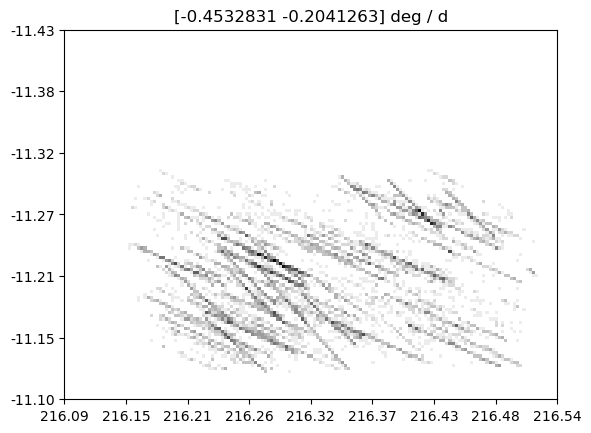

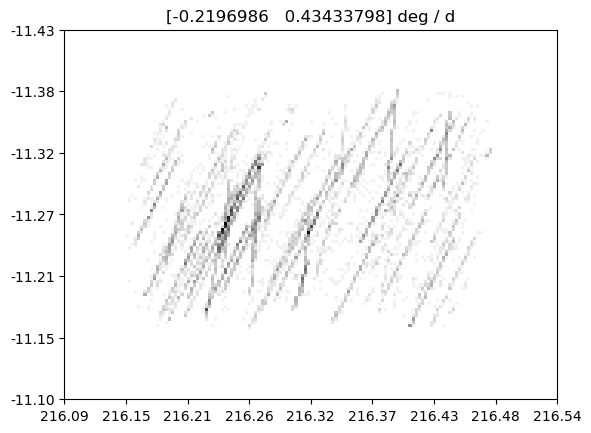

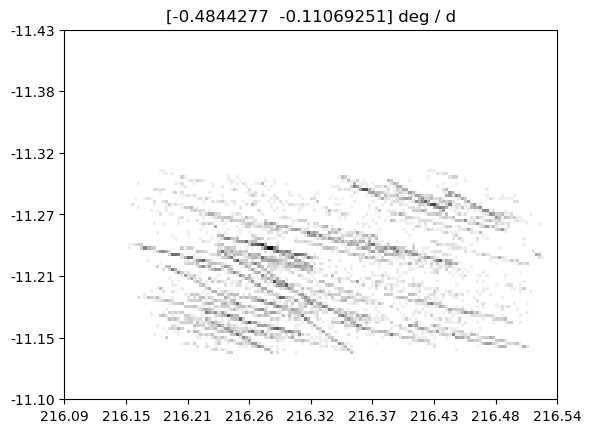

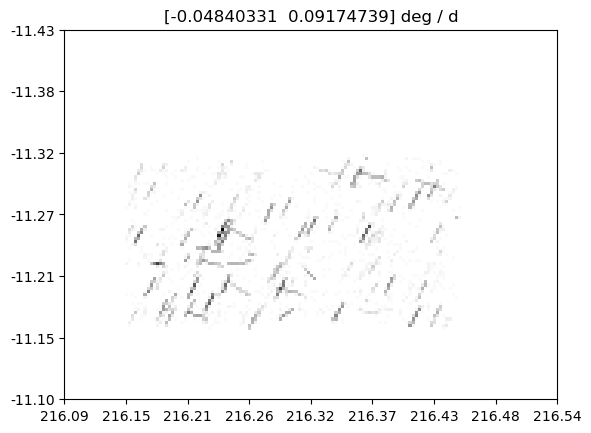

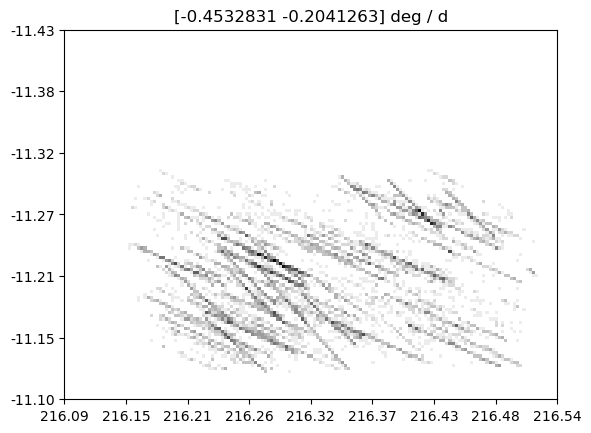

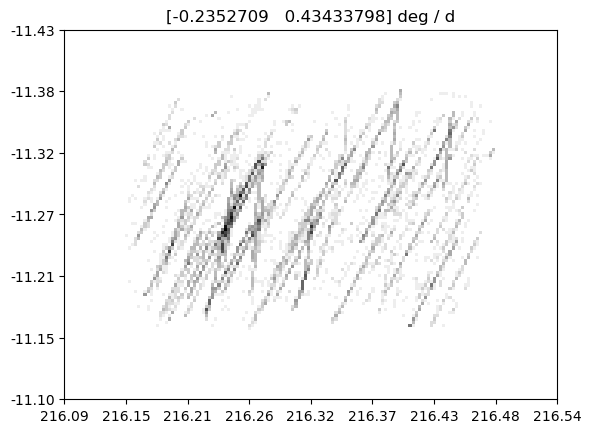

In [143]:
for i in [0, -1, d.b[:, 0].argmin(), d.b[:, 0].argmax(), d.b[:, 1].argmin(), d.b[:, 1].argmax()]:
    fig = plt.figure(dpi=100)
    plt.imshow(hough.array[i].T, cmap='gray_r')
    _x = plt.xticks()[0]
    x = [hough.min_x + hough.dx * __x for __x in _x]
    plt.xticks(_x, map(lambda x : "{:.2f}".format(x), x))
    
    _y = plt.yticks()[0]
    y = [hough.min_y + hough.dy * __y for __y in _y]
    plt.yticks(_y, map(lambda x : "{:.2f}".format(x), y))
        
    plt.title(d.b[i])
    plt.show()

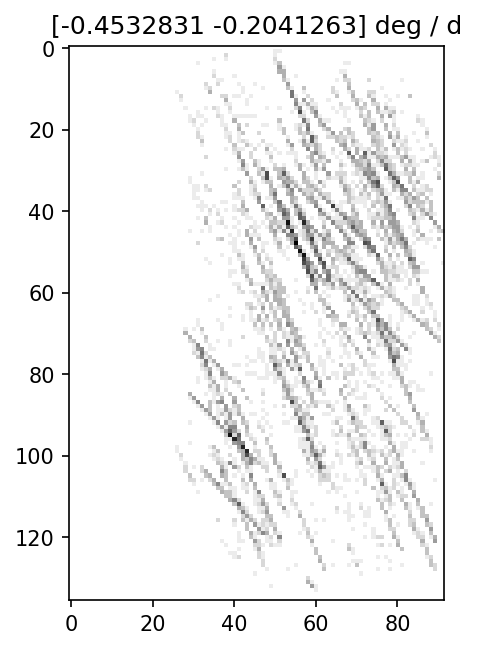

In [118]:
i = 0

fig = plt.figure(dpi=150)
plt.imshow(hough.array[i], cmap='gray_r')
plt.title(d.b[i])
plt.show()

In [59]:
c.extra['b']

302

In [65]:
hough.array.shape

(772, 136, 92)

In [67]:
projection.projected.shape

(772, 7151, 2)

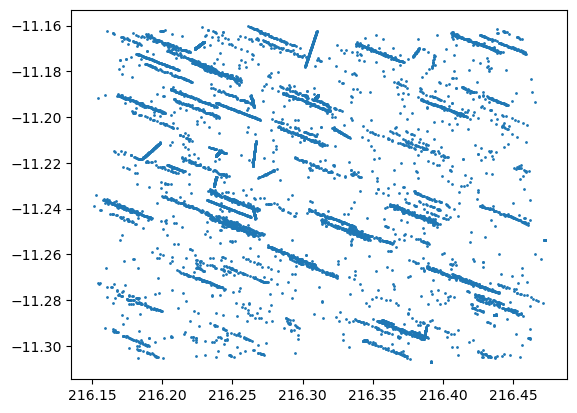

In [72]:
p = projection.projected[c.extra['b']]
plt.scatter(p[:, 0], p[:, 1], s=1)

In [ ]:
project(c.points, SearchDirections())

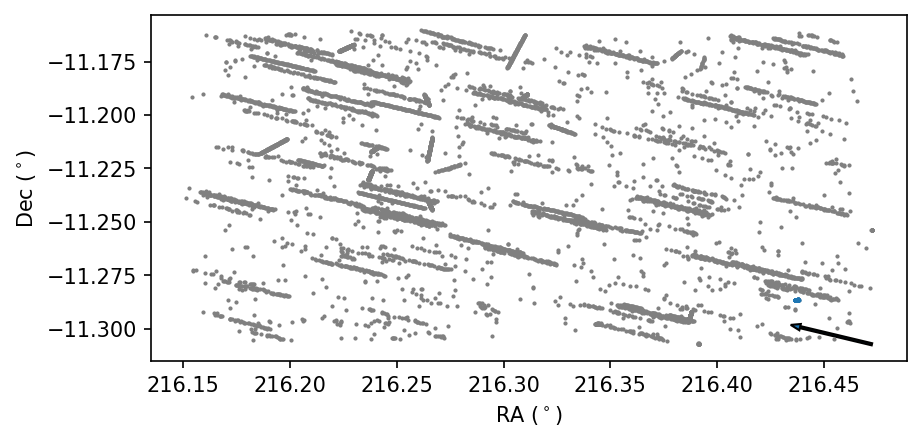

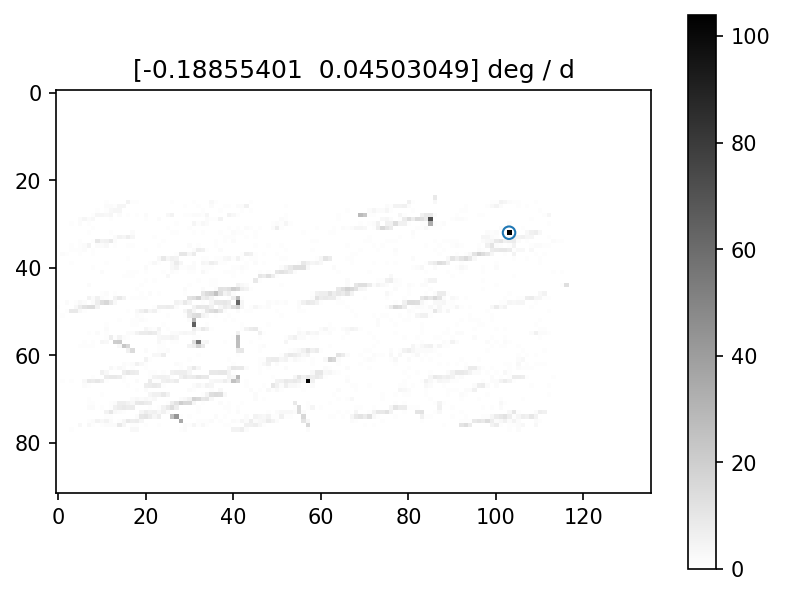

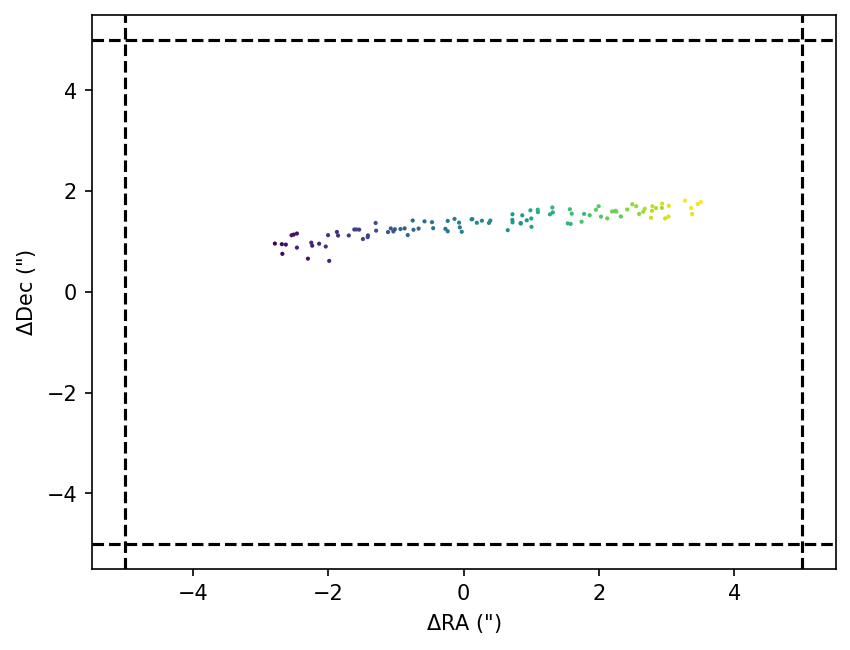

In [154]:
i = c.extra['b']
coords_p = SkyCoord(projection.projected[i, :, 0]*u.deg, projection.projected[i, :, 1]*u.deg)

c_p = transform_to_xy_prime(c.points, d.b[i][None, :], X[:, 2].min())
coords_c = SkyCoord(c_p[0, :, 0]*u.deg, c_p[0, :, 1]*u.deg)

fig = plt.figure(dpi=150, figsize=[7, 3])

x, y = coords_p.ra.max(), coords_p.dec.min()
dx = d.b[i, 0] * time.max()
dy = d.b[i, 1] * time.max()
plt.arrow(x.value, y.value, dx.value, dy.value)

# plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +3$^\circ$')
plt.scatter(coords_p.ra, coords_p.dec, c='gray', s=1)
plt.scatter(coords_c.ra, coords_c.dec, c='C0', s=1)
plt.gca().set_aspect("equal")
# plt.colorbar()
plt.xlabel(r"RA $(^\circ)$")
plt.ylabel(r"Dec $(^\circ)$")
plt.show()

fig = plt.figure(dpi=150)
plt.imshow(hough.array[i].T, cmap='gray_r')
plt.colorbar()
plt.scatter(
    c.extra['x'],
    c.extra['y'],
    facecolor='none',
    edgecolor='C0',
)
plt.title(d.b[i])
plt.show()

p1 = hough.min_x + hough.dx * c.extra['x']
p2 = hough.min_x + hough.dx * (c.extra['x'] + 1)
p3 = hough.min_y + hough.dy * c.extra['y']
p4 = hough.min_y + hough.dy * (c.extra['y'] + 1)
# plt.plot([p1, p2, p2, p1, p1], [p3, p3, p4, p4, p3], lw=1, color='k', ls='--')

# left, bottom, width, height = [0.65, 0.4, 0.2, 0.4]
# ax2 = fig.add_axes([left, bottom, width, height])
fig = plt.figure(dpi=150)
plt.scatter(
    (((p2 + p1)/2)*u.deg - coords_c.ra).to(u.arcsec), 
    (((p4 + p3)/2)*u.deg - coords_c.dec).to(u.arcsec), 
    c=c.points[:, 2], 
    s=1
)
plt.xlabel("$\Delta$RA (\")")
plt.ylabel("$\Delta$Dec (\")")
plt.axvline(-5, color='k', ls='--')
plt.axvline(5, color='k', ls='--')
plt.axhline(-5, color='k', ls='--')
plt.axhline(5, color='k', ls='--')
# plt.legend()
plt.show()

In [151]:
c.extra

{'votes': 104, 'b': 302, 'y': 32, 'x': 103}

In [79]:
hough.min_x + hough.dx * c.extra['x']

216.43589356567193